In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ord_prior = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/order_products__prior.csv')
ord_train = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/order_products__train.csv')
orders = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/orders.csv')
product = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/products.csv')
department = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/departments.csv')
aisles = pd.read_csv('C:/Users/ASUS/Desktop/project/instacart/aisles.csv')

In [3]:
orders = orders[orders['eval_set'] != 'test']
order_grp = orders.loc[orders.groupby('user_id').order_number.idxmax()]

In [4]:
print(ord_prior.isnull().any())
print(ord_train.isnull().any())
print(orders.isnull().any())
print(product.isnull().any())
print(department.isnull().any())
print(aisles.isnull().any())

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool
order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool
order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool
product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool
department_id    False
department       False
dtype: bool
aisle_id    False
aisle       False
dtype: bool


In [5]:
ord_prior[:10]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [6]:
ord_train[:10]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [7]:
orders[orders['user_id'] == 3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [8]:
orders[orders['order_id'] == 3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3417191,3,205970,prior,16,5,17,12.0


In [9]:
orders[orders['user_id'] == 205970]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3417176,2760350,205970,prior,1,3,16,NaN
3417177,728710,205970,prior,2,3,11,28.0
3417178,2638685,205970,prior,3,2,14,30.0
3417179,1950137,205970,prior,4,6,12,11.0
3417180,109121,205970,prior,5,0,10,8.0
3417181,1542535,205970,prior,6,3,8,17.0
3417182,536652,205970,prior,7,2,17,6.0
3417183,1861250,205970,prior,8,6,10,4.0
3417184,972902,205970,prior,9,1,19,2.0
3417185,1828971,205970,prior,10,0,16,6.0


In [11]:
ord_prior[ord_prior['order_id'] == 972902]

,order_id,product_id,add_to_cart_order,reordered
9217656,972902,24852,1,1
9217657,972902,4957,2,1
9217658,972902,33754,3,1
9217659,972902,16797,4,1
9217660,972902,37766,5,1
9217661,972902,49683,6,1
9217662,972902,17704,7,1
9217663,972902,38456,8,1
9217664,972902,39275,9,1
9217665,972902,47209,10,1


In [12]:
ord_prior[ord_prior['order_id'] == 1302074]

,order_id,product_id,add_to_cart_order,reordered
12334890,1302074,6187,1,1
12334891,1302074,21506,2,0
12334892,1302074,46667,3,1
12334893,1302074,4957,4,1
12334894,1302074,5077,5,1
12334895,1302074,9124,6,1
12334896,1302074,33754,7,1
12334897,1302074,28156,8,0
12334898,1302074,39475,9,0


In [13]:
ord_prior[ord_prior['order_id'] == 	186706]

,order_id,product_id,add_to_cart_order,reordered
1770588,186706,14947,1,1
1770589,186706,5707,2,1
1770590,186706,44632,3,0
1770591,186706,30881,4,1
1770592,186706,43633,5,1


In [14]:
product[:10]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [15]:
department[department['department_id']==7]

,department_id,department
6,7,beverages


In [16]:
aisles[aisles['aisle_id'] == 120]

,aisle_id,aisle
119,120,yogurt


In [20]:
import gc
gc.collect()

20

# EDA

In [18]:
order_com = pd.concat([ord_prior,ord_train], axis=0)

In [19]:
order_all = pd.merge(orders, order_com, how='left', on='order_id' )
order_pt = pd.merge(order_com, product, how='left', on='product_id')
order_withpt = pd.merge(order_all, product, how='left', on='product_id')

## order_number

In [21]:
order_all.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


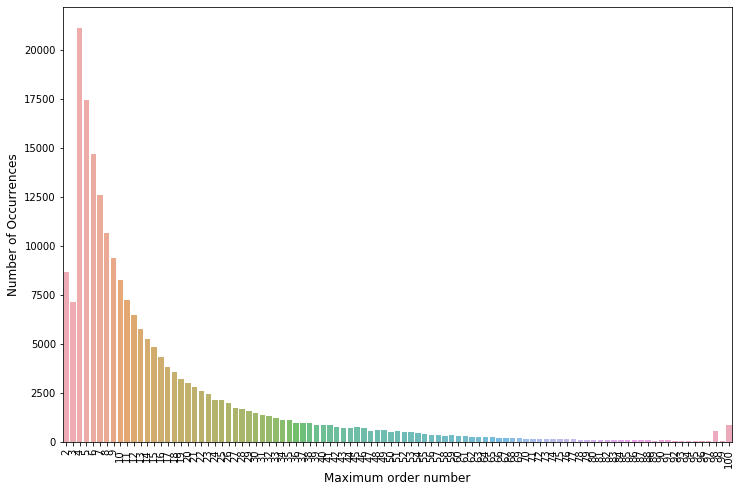

In [29]:
cnt_srs_num = order_all.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs_num = cnt_srs_num.order_number.value_counts()

plt.figure(figsize=(12,8))
sns_plot = sns.barplot(cnt_srs_num.index, cnt_srs_num.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
sns_plot.figure.savefig('order_number.png')

## add_to_cart_number

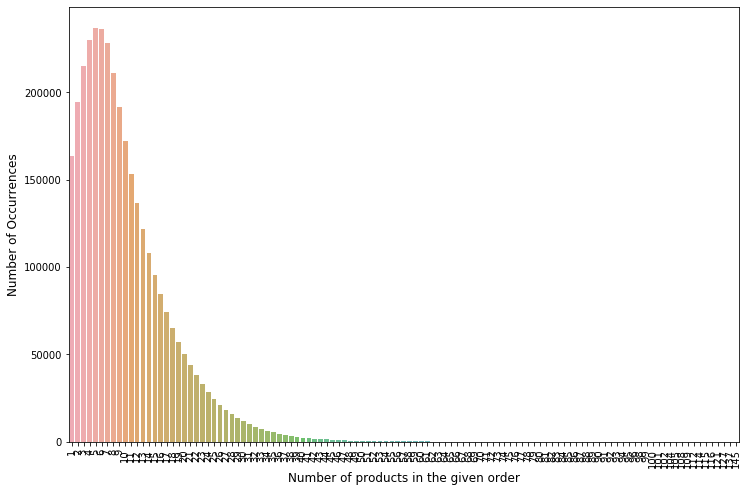

In [30]:
grouped_df = order_com.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs_cart = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns_plot = sns.barplot(cnt_srs_cart.index, cnt_srs_cart.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
sns_plot.figure.savefig('add_to_cart_number.png')

## aisles

In [30]:
cnt_srs = order_pt['aisle_id'].value_counts().head(20).reset_index()

In [23]:
cnt_srs = cnt_srs.rename(columns={'aisle_id':'aisle'})

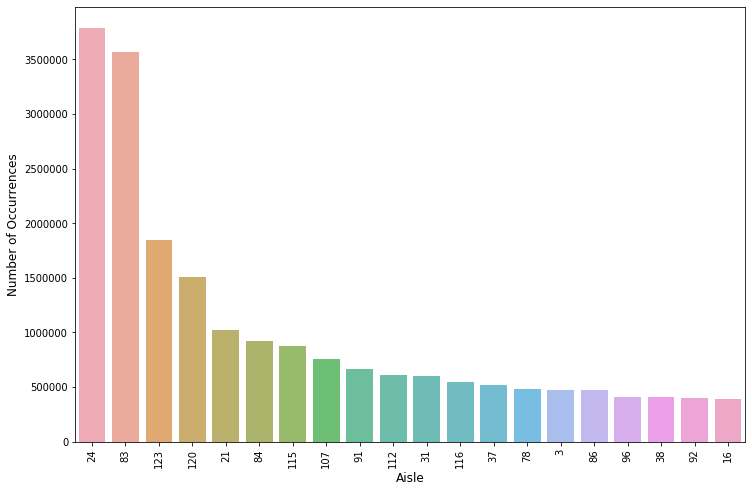

In [24]:
plt.figure(figsize=(12,8))
sns_plot = sns.barplot(x='index', y="aisle", data=cnt_srs, order=cnt_srs['index'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
sns_plot.figure.savefig('aisles.png')
plt.show()

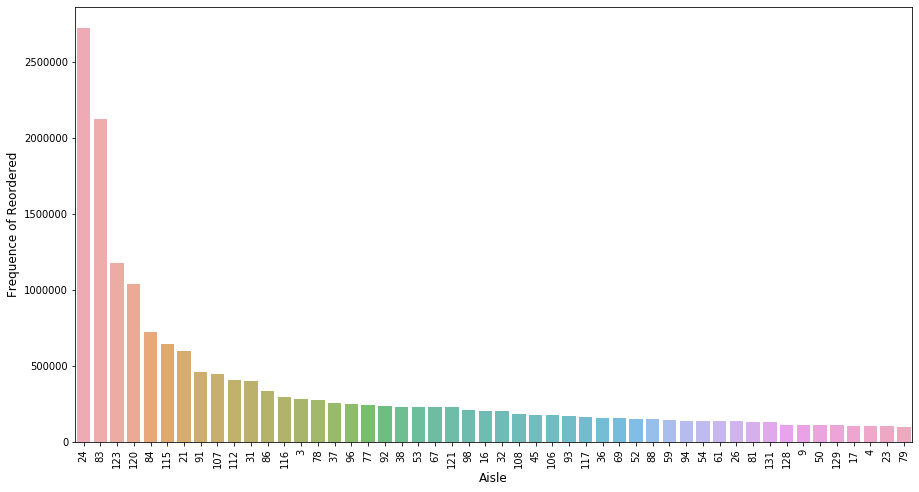

In [42]:
cnt_srs = order_pt.groupby(['aisle_id']).agg({'reordered':'sum'}).reset_index().sort_values(by='reordered', ascending=False).head(50)
plt.figure(figsize=(15,8))
sns_plot = sns.barplot(x='aisle_id', y="reordered", data=cnt_srs, order=cnt_srs['aisle_id'], alpha=0.8)
plt.ylabel('Frequence of Reordered', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
sns_plot.figure.savefig('aisles_reordered.png')
plt.show()

## department

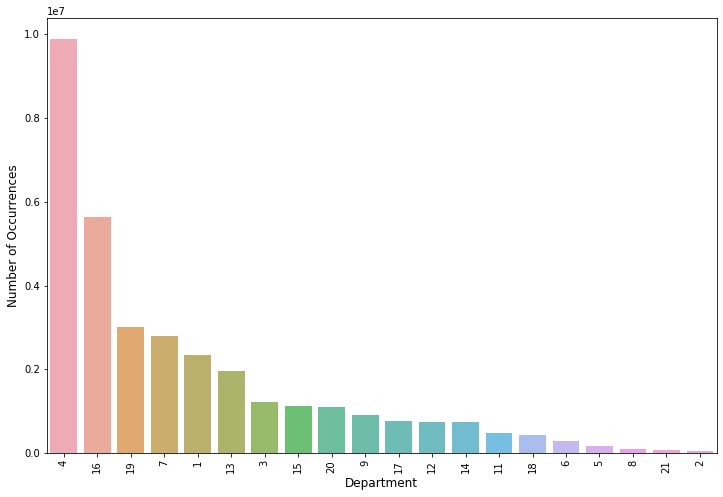

In [46]:
cnt_srs1 = order_pt['department_id'].value_counts().head(20).reset_index()
cnt_srs1 = cnt_srs1.rename(columns={'department_id':'department'})
plt.figure(figsize=(12,8))
sns_plot = sns.barplot(x='index', y="department", data=cnt_srs1, order=cnt_srs1['index'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
sns_plot.figure.savefig('departments.png')

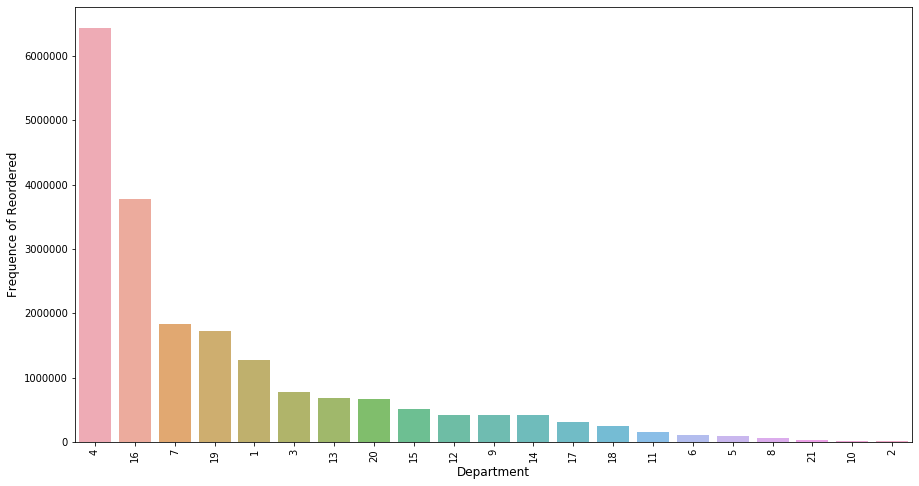

In [47]:
cnt_srs1 = order_pt.groupby(['department_id']).agg({'reordered':'sum'}).reset_index().sort_values(by='reordered', ascending=False).head(50)
plt.figure(figsize=(15,8))
sns_plot = sns.barplot(x='department_id', y="reordered", data=cnt_srs1, order=cnt_srs1['department_id'], alpha=0.8)
plt.ylabel('Frequence of Reordered', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
sns_plot.figure.savefig('departments_reordered.png')
plt.show()

## product

<Figure size 1440x360 with 0 Axes>

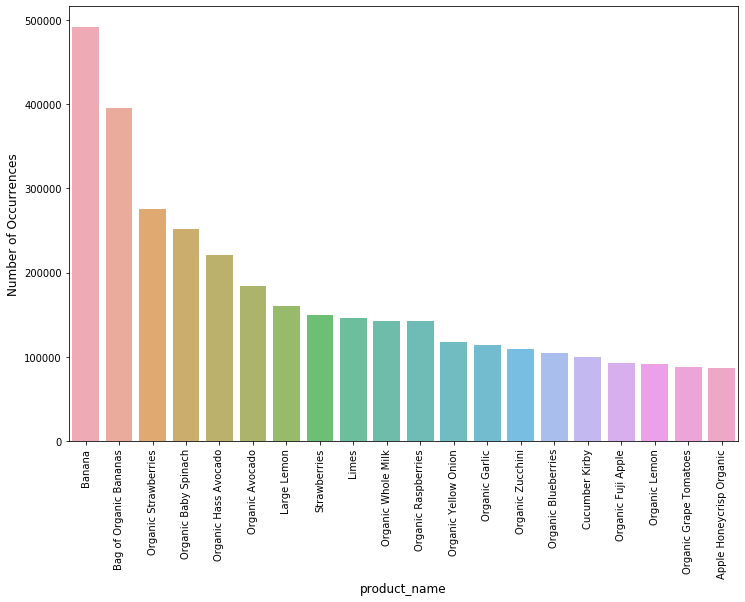

In [172]:
cnt_srs = order_pt['product_name'].value_counts().head(20).reset_index()
plt.figure(figsize=(12,8))
sns_plot = sns.barplot(x='index', y="product_name", data=cnt_srs, order=cnt_srs['index'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product_name', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
sns_plot.figure.savefig('products.png',bbox_inches='tight')

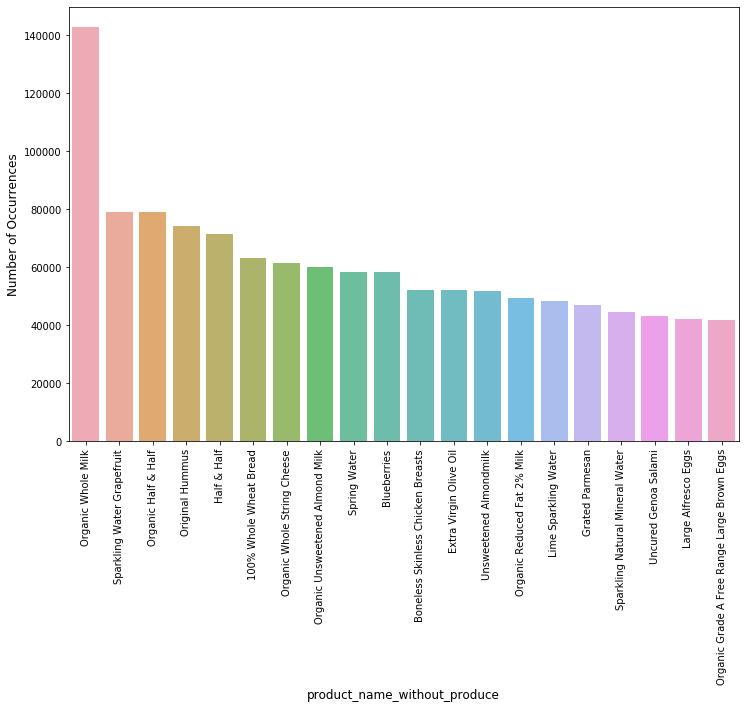

In [173]:
cnt_srs2 = order_pt[order_pt['department_id'] != 4]['product_name'].value_counts().head(20).reset_index()
plt.figure(figsize=(12,8))
sns_plot = sns.barplot(x='index', y="product_name", data=cnt_srs2, order=cnt_srs['index'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('product_name_without_produce', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
sns_plot.figure.savefig('product_without_produce.png',bbox_inches='tight')

# Time

* 消費集中在星期六、日的早上

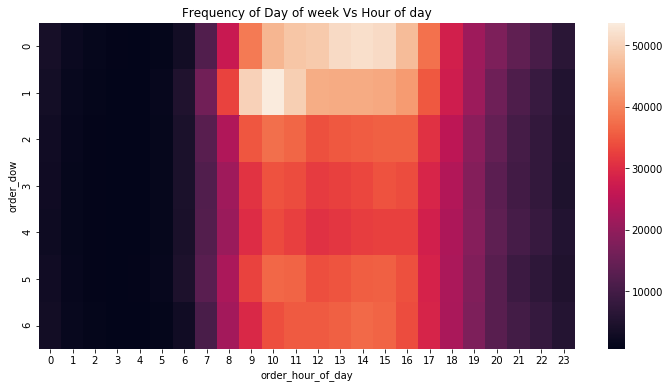

In [135]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns_heat = sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()
sns_heat.figure.savefig('order_time.png')

## days_since_prior_order

* 消費者的訂購間距集中在<b>7天與30天

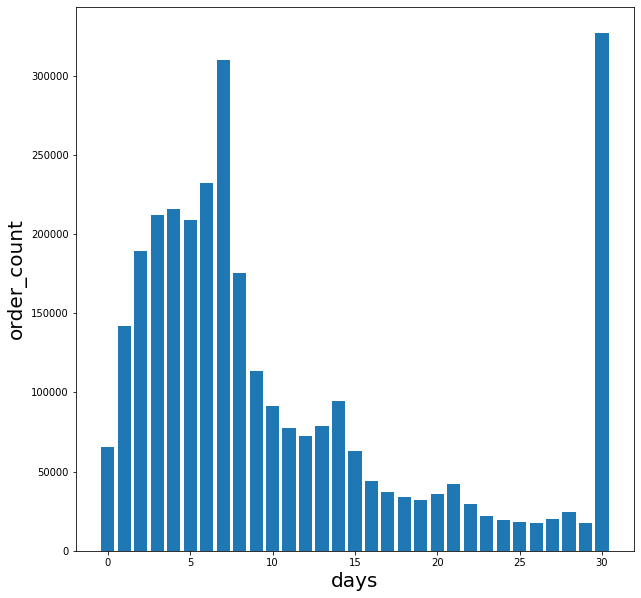

In [183]:
plt.figure(figsize=(10,10))
plt.bar(orders.dropna().groupby('days_since_prior_order', as_index=False)['order_id'].count()['days_since_prior_order'], orders.dropna().groupby('days_since_prior_order', as_index=False)['order_id'].count()['order_id'])
plt.xlabel('days', fontsize=20)
plt.ylabel('order_count', fontsize=20)
plt.savefig('days_since_prior_order.png',bbox_inches='tight')

In [138]:
orders[orders['days_since_prior_order'] == 30]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
9,2550362,1,prior,10,4,8,30.0
21,1402090,2,prior,11,1,10,30.0
23,3268552,2,prior,13,4,11,30.0
25,1492625,2,train,15,1,11,30.0
55,2402008,7,prior,2,1,19,30.0
...,...,...,...,...,...,...,...
3421014,1452193,206207,prior,13,1,12,30.0
3421071,1542354,206209,prior,3,5,11,30.0
3421072,688306,206209,prior,4,1,10,30.0
3421079,1854736,206209,prior,11,4,10,30.0


In [139]:
order_7and30 = orders[(orders['days_since_prior_order'] == 7) | (orders['days_since_prior_order'] == 30)]

* 訂購間距在7天與30天的訂購時間沒顯著差別，都集中在中午時段，7天的消費者偏好早上購買，30天的消費者偏好中午購買

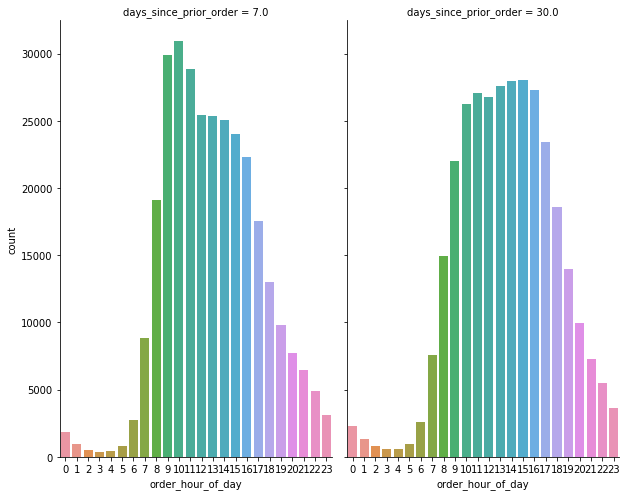

In [140]:
sns_cat = sns.catplot(x = 'order_hour_of_day',col='days_since_prior_order',data=order_7and30,kind="count",height=7, aspect=.6, col_wrap=3)
sns_cat.savefig('days_since_prior_order_2.png')

In [68]:
order_7and30_withpt = pd.merge(order_7and30, order_com, how='left', on='order_id' )
order_7and30_withpt = pd.merge(order_7and30_withpt, product, how='left', on='product_id')

* 消費的department分布與消費間距無相關，都集中在department 1, 4, 7, 13, 16, 19 (frozen, produce, beveages, pantry, dairy eggs, snacks) 

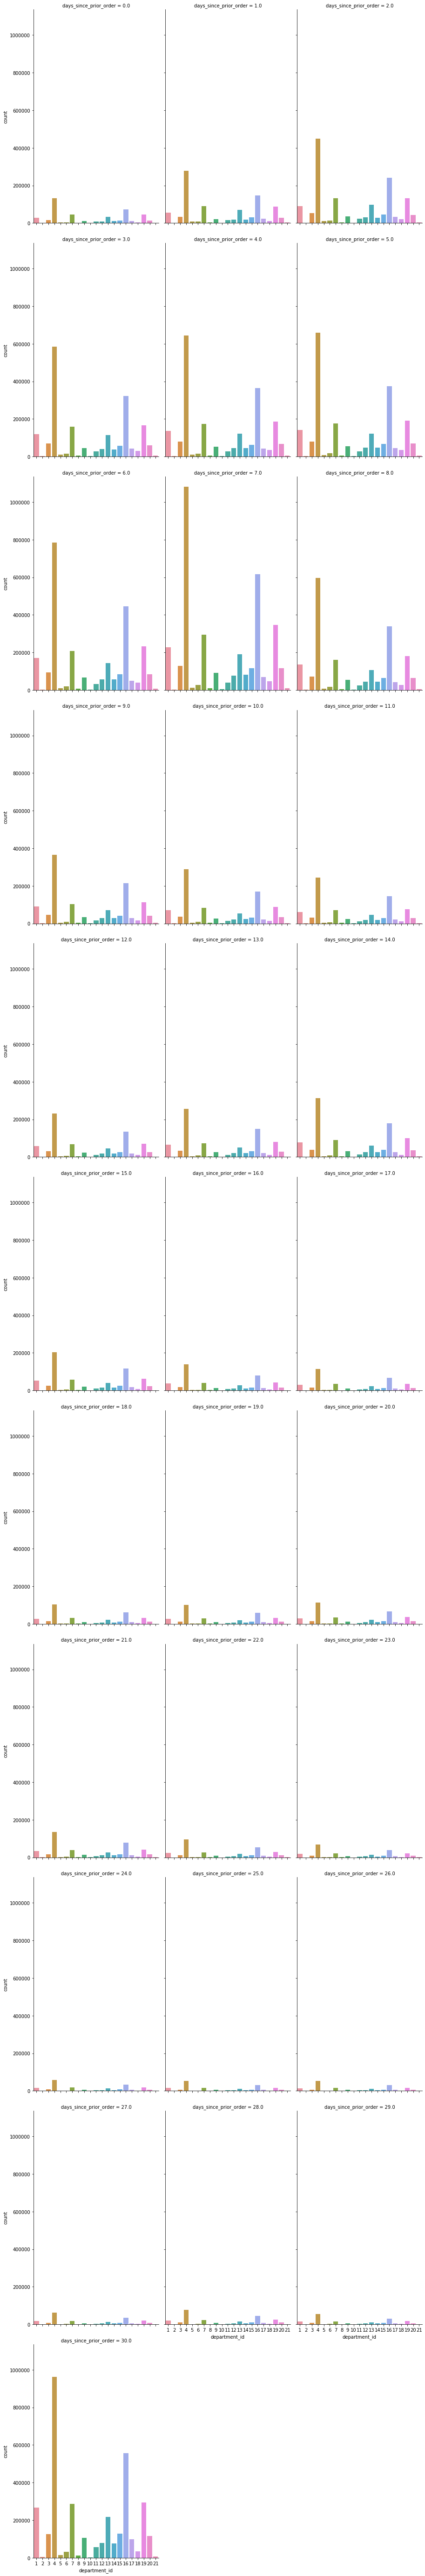

In [73]:
sns.catplot(x = 'department_id',col='days_since_prior_order',data=order_withpt,kind="count",height=7, aspect=.6, col_wrap=3)

In [80]:
for i in [1,4,7,13,16,19]:
    print(department[department['department_id'] == i])

   department_id department
0              1     frozen
   department_id department
3              4    produce
   department_id department
6              7  beverages
    department_id department
12             13     pantry
    department_id  department
15             16  dairy eggs
    department_id department
18             19     snacks


## order_hour_of_day

* 整體來看，消費者偏好在早上8點至晚上8點之間訂購

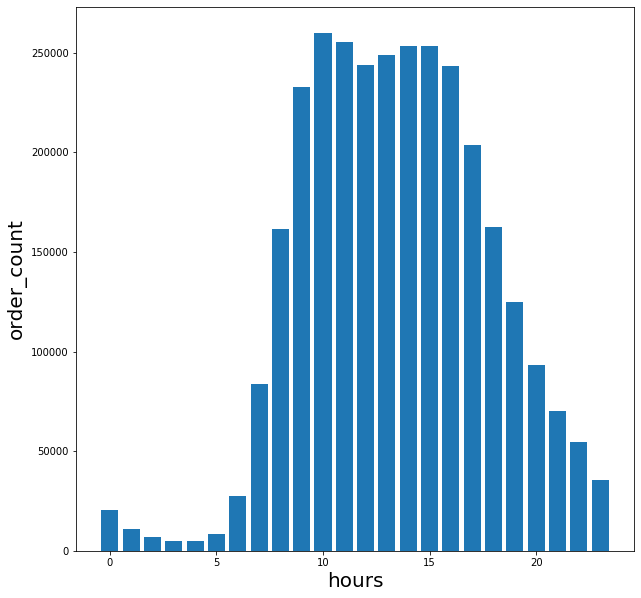

In [185]:
plt.figure(figsize=(10,10))
plt.bar(orders.groupby('order_hour_of_day', as_index=False)['order_id'].count()['order_hour_of_day'], orders.dropna().groupby('order_hour_of_day', as_index=False)['order_id'].count()['order_id'])
plt.xlabel('hours', fontsize=20)
plt.ylabel('order_count', fontsize=20)
plt.savefig('order_hour_of_day.png',bbox_inches='tight')

In [143]:
gc.collect()

8427

In [144]:
cols = list(order_withpt.columns)
order_7to12 = pd.DataFrame(columns = cols)
for i in [7,8,9,10,11,12]:
    order_7to12 = pd.concat([order_7to12, order_withpt[order_withpt['order_hour_of_day'] == i]])

In [ ]:
order_13to18 = pd.DataFrame(columns = cols)
for i in [13,14,15,16,17,18]:
    order_13to18 = pd.concat([order_13to18, order_withpt[order_withpt['order_hour_of_day'] == i]])

In [111]:
order_19to23 = pd.DataFrame(columns = cols)
for i in [19,20,21,22,23]:
    order_19to23 = pd.concat([order_19to23, order_withpt[order_withpt['order_hour_of_day'] == i]])

In [127]:
order_0to6 = pd.DataFrame(columns = cols)
for i in [0,1,2,3,4,5,6]:
    order_0to6 = pd.concat([order_0to6, order_withpt[order_withpt['order_hour_of_day'] == i]])

* 訂購時間與訂購商品的department沒有顯著影響

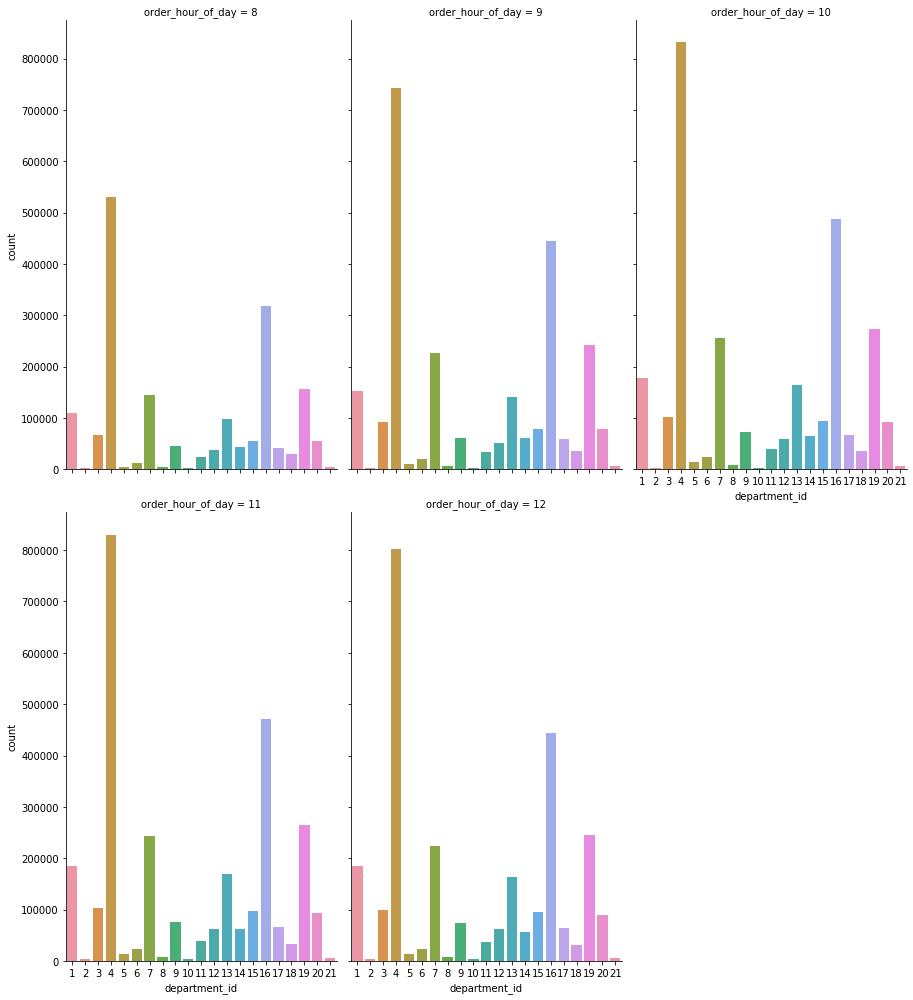

In [112]:
sns.catplot(x = 'department_id',col='order_hour_of_day',data=order_7to12,kind="count",height=7, aspect=.6, col_wrap=3)

In [146]:
gc.collect()

20

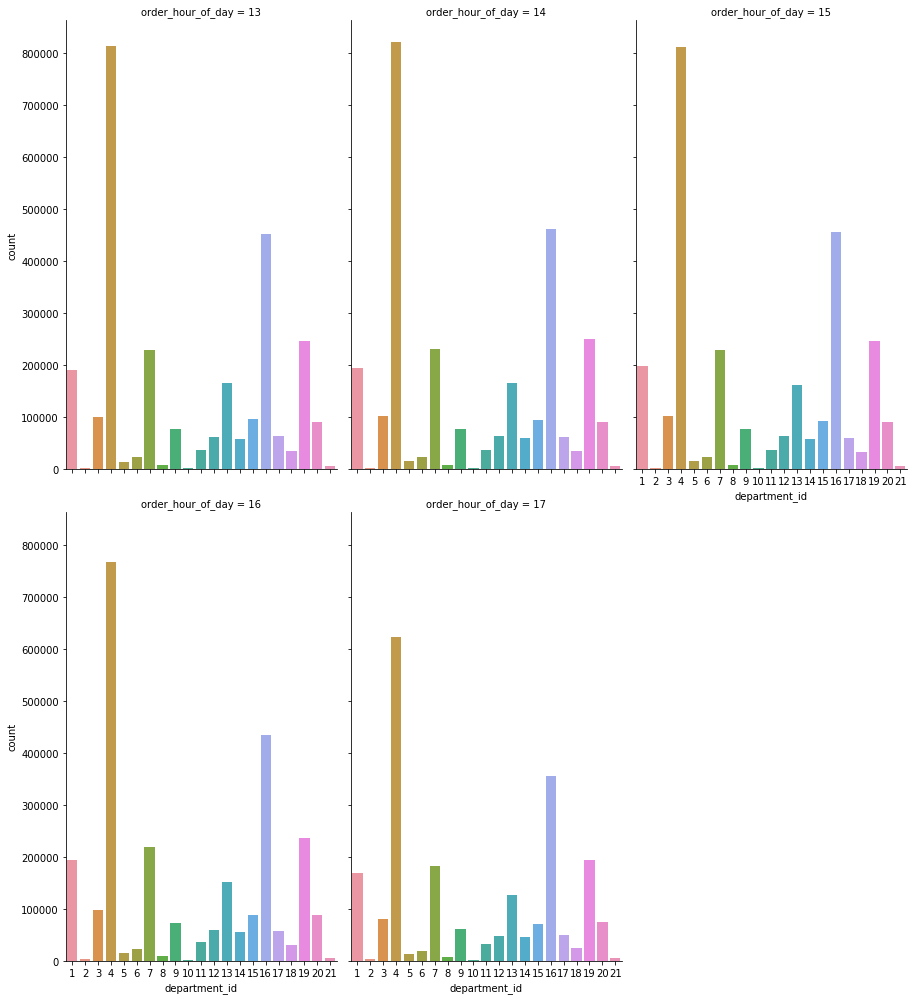

In [113]:
sns.catplot(x = 'department_id',col='order_hour_of_day',data=order_13to18,kind="count",height=7, aspect=.6, col_wrap=3)

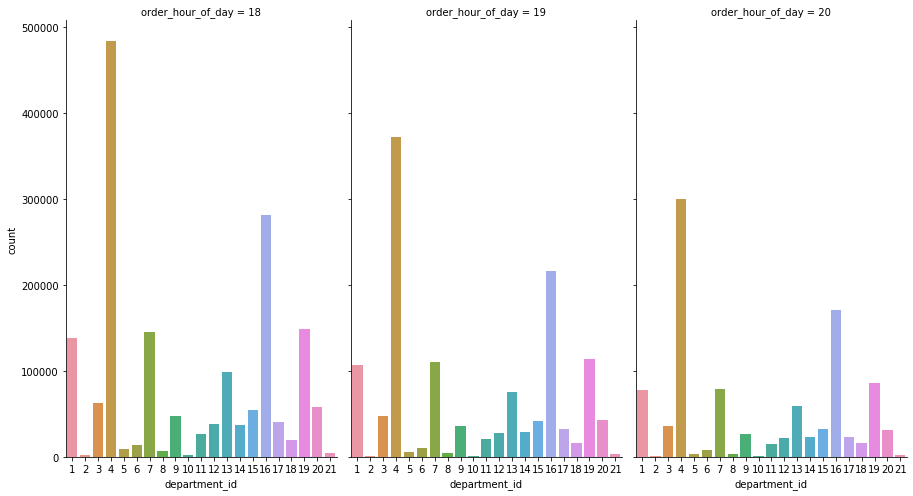

In [114]:
sns.catplot(x = 'department_id',col='order_hour_of_day',data=order_19to23,kind="count",height=7, aspect=.6, col_wrap=3)

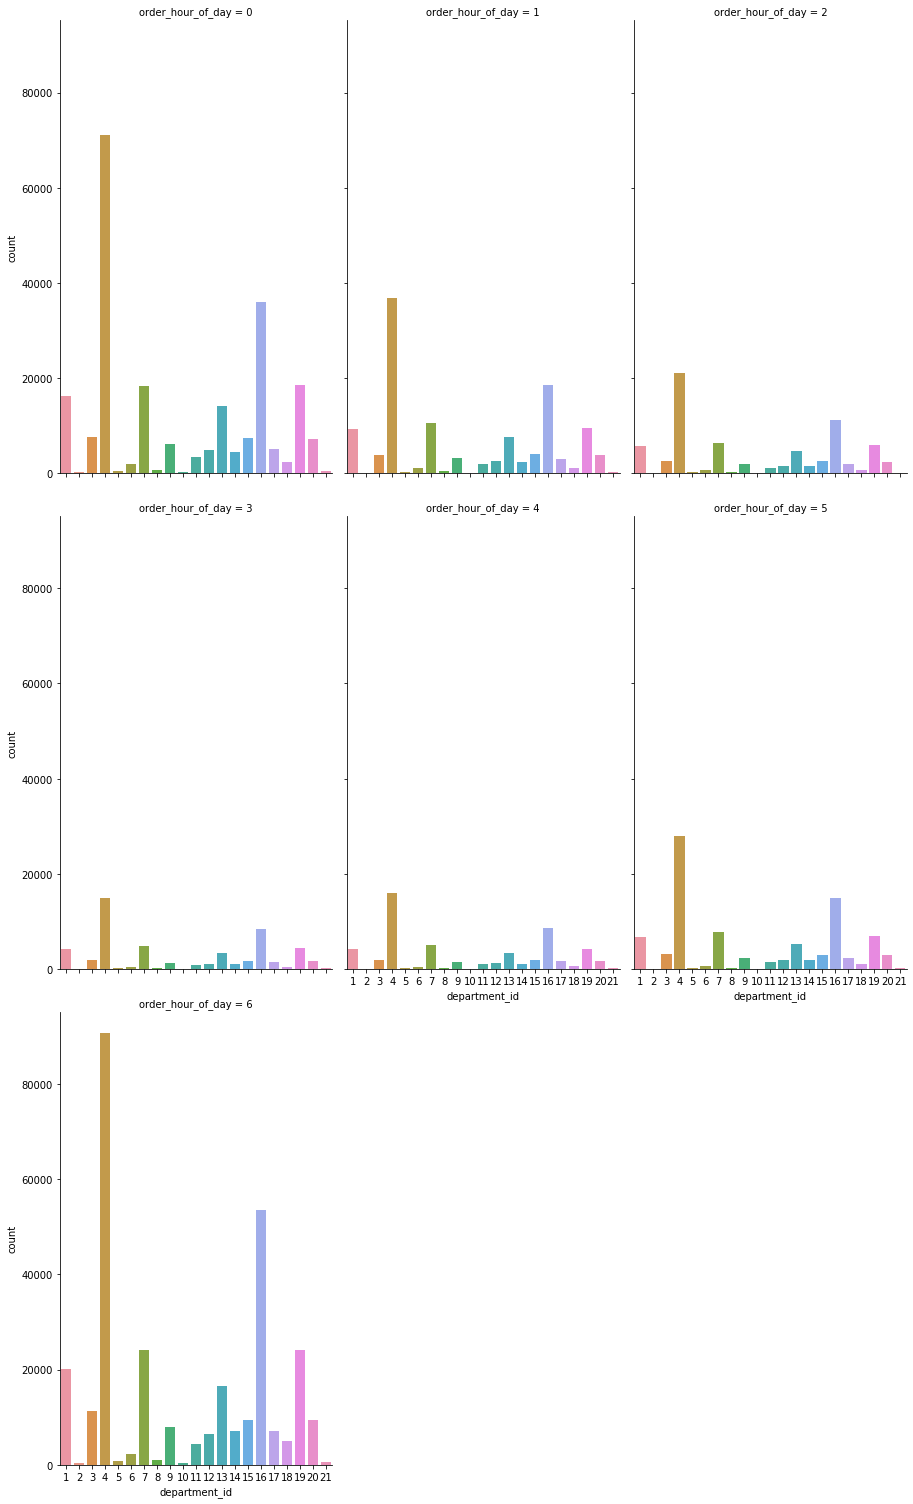

In [128]:
sns.catplot(x = 'department_id',col='order_hour_of_day',data=order_0to6,kind="count",height=7, aspect=.6, col_wrap=3)

In [147]:
gc.collect()

20

* 每個department的訂購時間趨勢都一致，department不受訂購時間影響

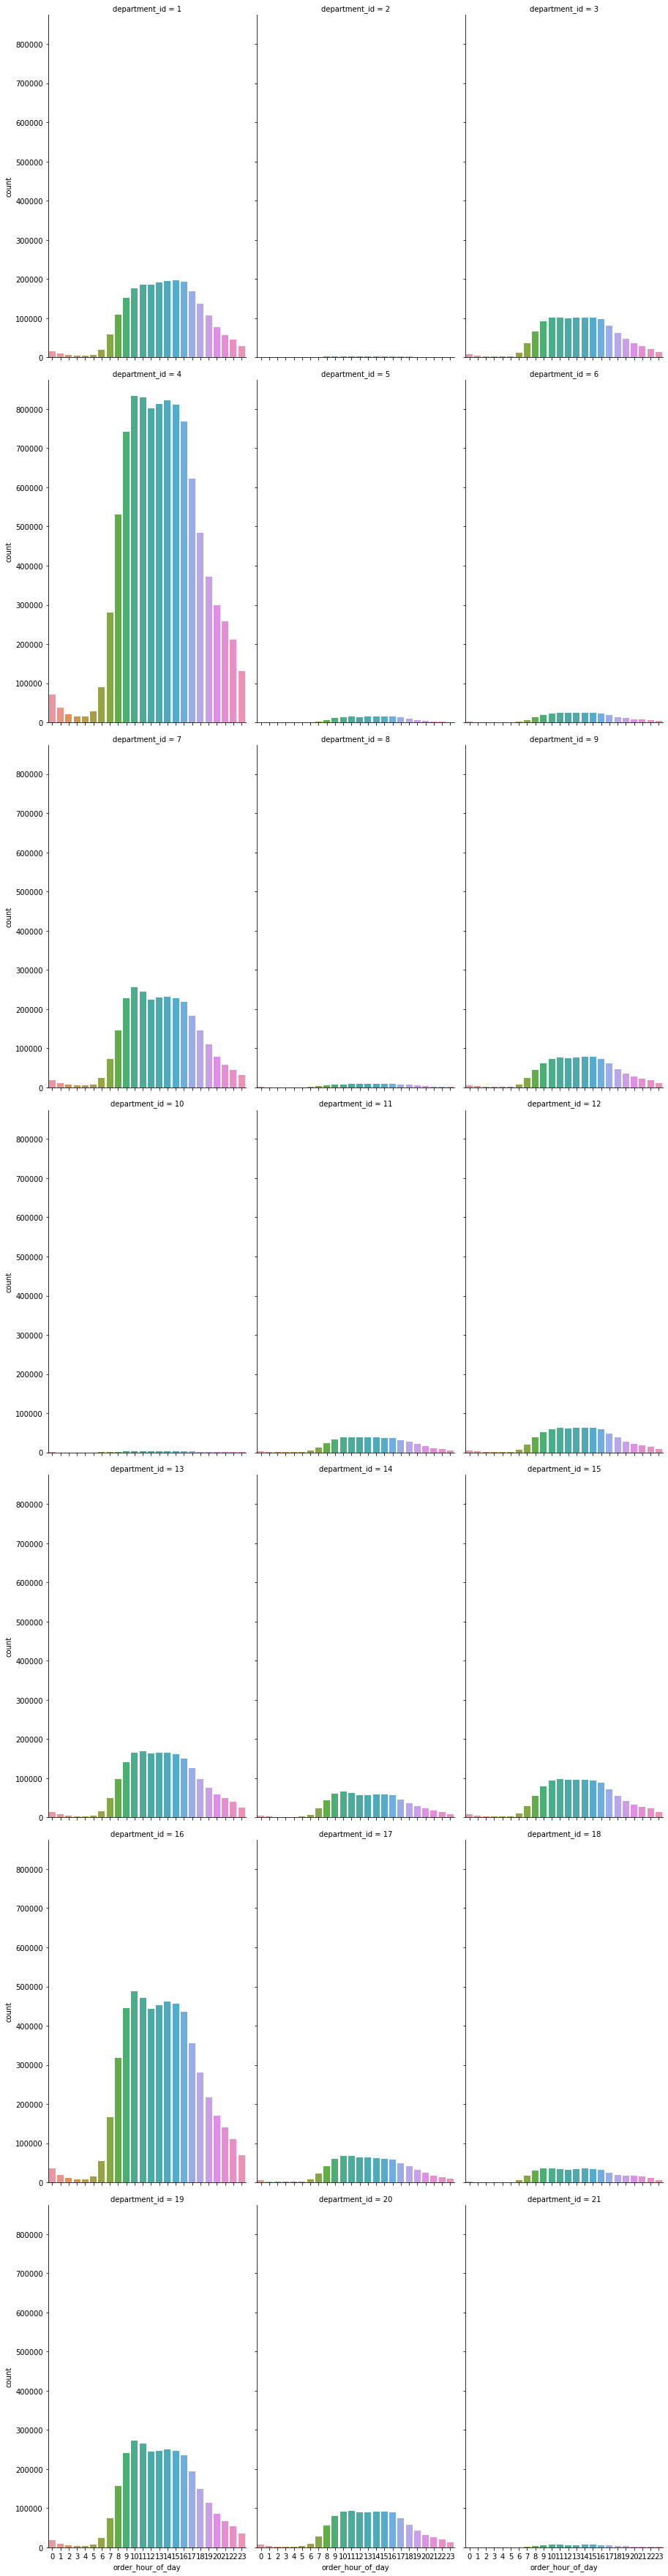

In [10]:
sns.catplot(x = 'order_hour_of_day',col='department_id',data=order_withpt,kind="count",height=7, aspect=.6, col_wrap=3)

In [ ]:
gc.collect()

## order_dow

* 0與1依據訂購總量可推斷為周末六日

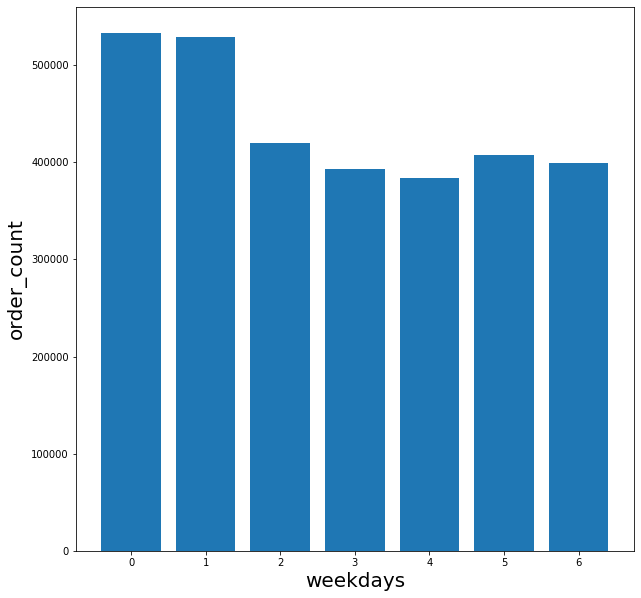

In [180]:
plt.figure(figsize=(10,10))
plt.bar(orders.groupby('order_dow', as_index=False)['order_id'].count()['order_dow'], orders.dropna().groupby('order_dow', as_index=False)['order_id'].count()['order_id'])
plt.xlabel('weekdays', fontsize=20)
plt.ylabel('order_count', fontsize=20)
plt.savefig('order_dow.png',bbox_inches='tight')

## order_hour_in_dow

* 周末六日與其他天的訂購時段分布無顯著差異

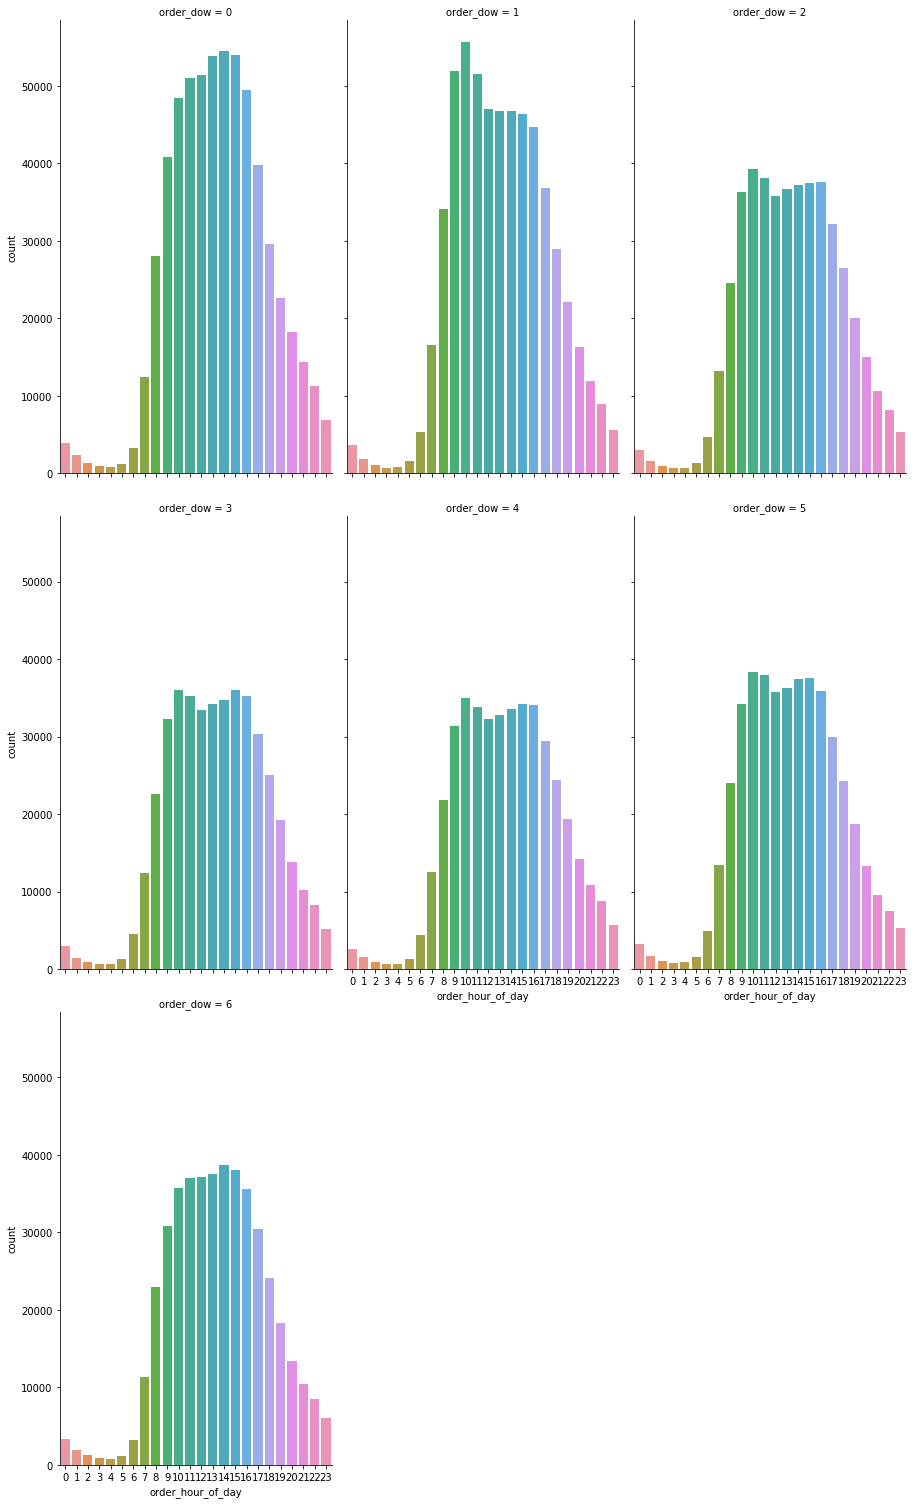

In [202]:
sns.catplot(x = 'order_hour_of_day',col='order_dow',data=orders,kind="count",height=7, aspect=.6, col_wrap=3)

## reordered & non-reorder

In [18]:
reorder_sum = order_com.groupby(by='product_id', as_index=False).agg({'reordered':sum}).sort_values(by='reordered', ascending=False)

In [19]:
reorder_sum['reordered'].mean()

401.63751635302407

In [20]:
reorder_sum[reorder_sum['reordered']>(reorder_sum['reordered'].mean())]

,product_id,reordered
24849,24852,415166
13173,13176,329275
21134,21137,214448
21900,21903,194939
47205,47209,176173
...,...,...
24505,24508,402
32676,32679,402
16133,16136,402
777,778,402


In [127]:
reorder_sum[reorder_sum['reordered']==0]

,product_id,reordered
2092,2093,0
20579,20582,0
19748,19751,0
22008,22011,0
33871,33874,0
...,...,...
45968,45971,0
37378,37381,0
15331,15334,0
15328,15331,0


In [128]:
reorder_sum['reordered'].quantile([.25,.5,.75])

0.25      4.0
0.50     23.0
0.75    121.0
Name: reordered, dtype: float64

* reorder與non-reorder總次數比較

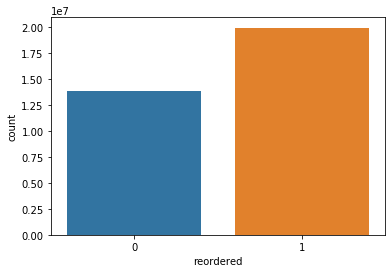

In [150]:
sns_count = sns.countplot(order_com['reordered'])
sns_count.figure.savefig('reordered_nonreordered_count.png')

* department 4, 7, 16 (produce, beverages, eggs) 的回購比率較高
* department 11, 13, 15, 17 (personal care, pantry, canned goods, households) 的不回購率較高

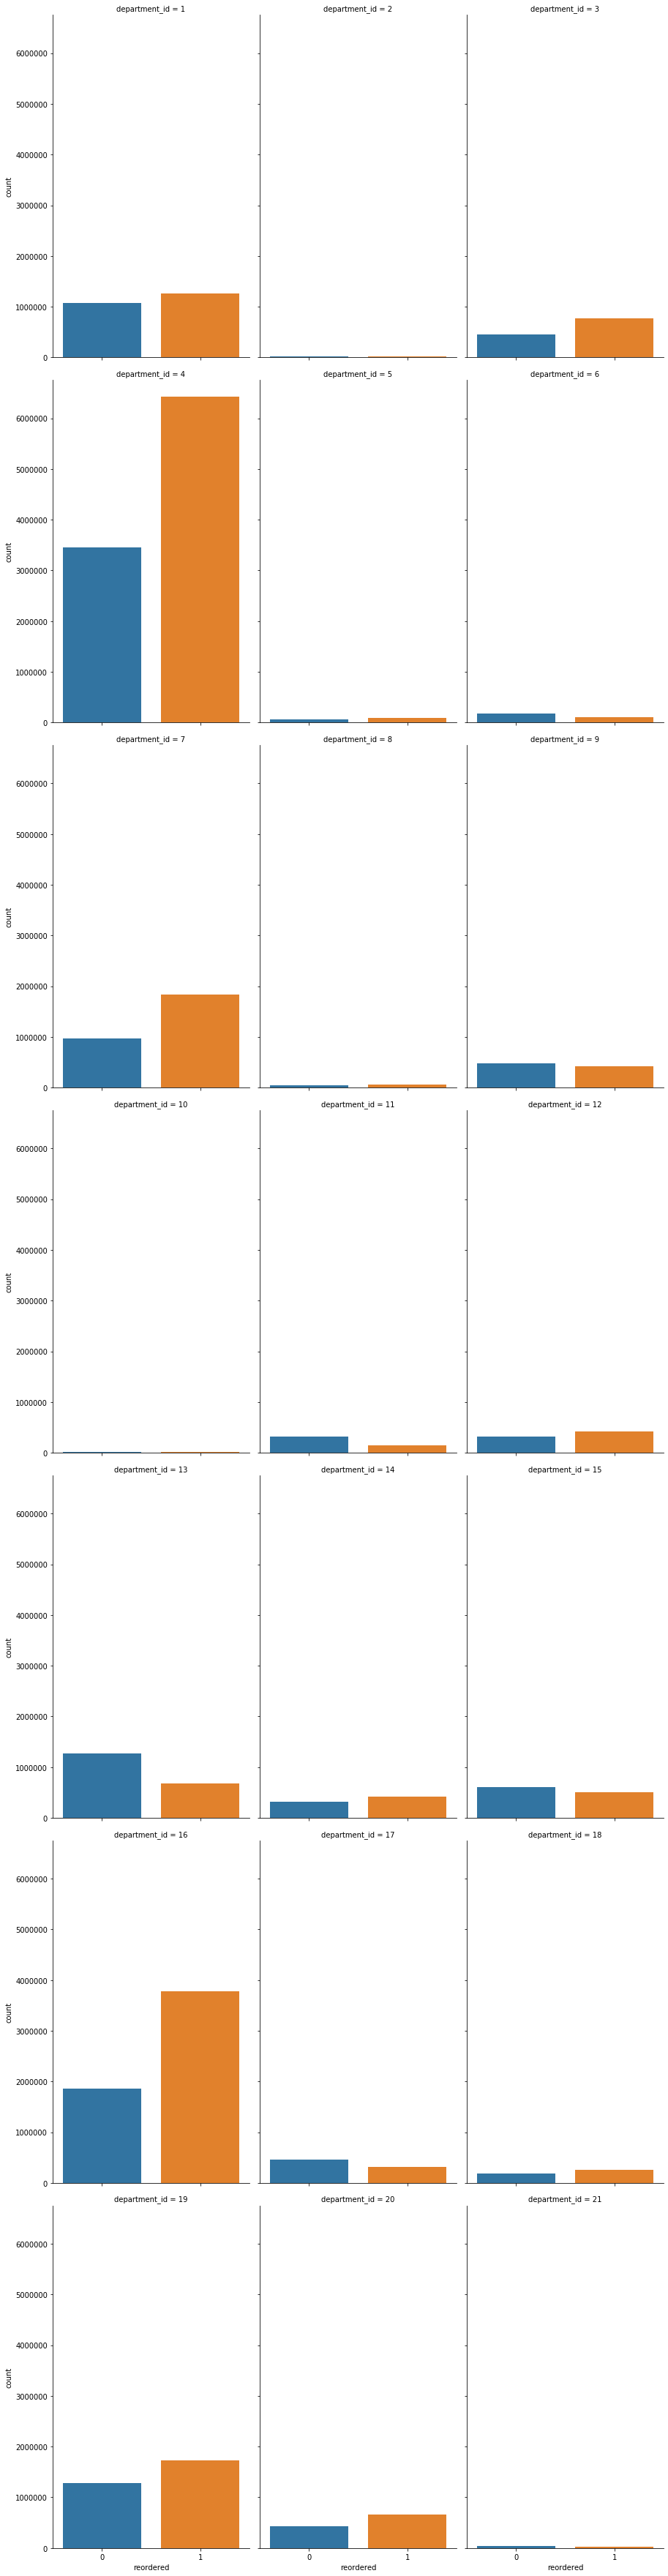

In [205]:
sns.catplot(x = 'reordered',col='department_id',data=order_withpt,kind="count",height=7, aspect=.6, col_wrap=3)

In [12]:
print(department[department['department_id'] == 4])
print(department[department['department_id'] == 7])
print(department[department['department_id'] == 16])

   department_id department
3              4    produce
   department_id department
6              7  beverages
    department_id  department
15             16  dairy eggs


In [14]:
print(department[department['department_id'] == 11])
print(department[department['department_id'] == 13])
print(department[department['department_id'] == 15])
print(department[department['department_id'] == 17])

    department_id     department
10             11  personal care
    department_id department
12             13     pantry
    department_id    department
14             15  canned goods
    department_id department
16             17  household


In [15]:
print(department[department['department_id'] == 2])
print(department[department['department_id'] == 5])
print(department[department['department_id'] == 6])
print(department[department['department_id'] == 8])
print(department[department['department_id'] == 10])

   department_id department
1              2      other
   department_id department
4              5    alcohol
   department_id     department
5              6  international
   department_id department
7              8       pets
   department_id department
9             10       bulk


* department 21 是missing

In [210]:
product[product['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [214]:
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [154]:
gc.collect()

5114

### 回購率高的department(4,7,16)

* department 4 回購率集中在蔬果

In [152]:
order_dp4 = order_withpt[order_withpt['department_id'] == 4]

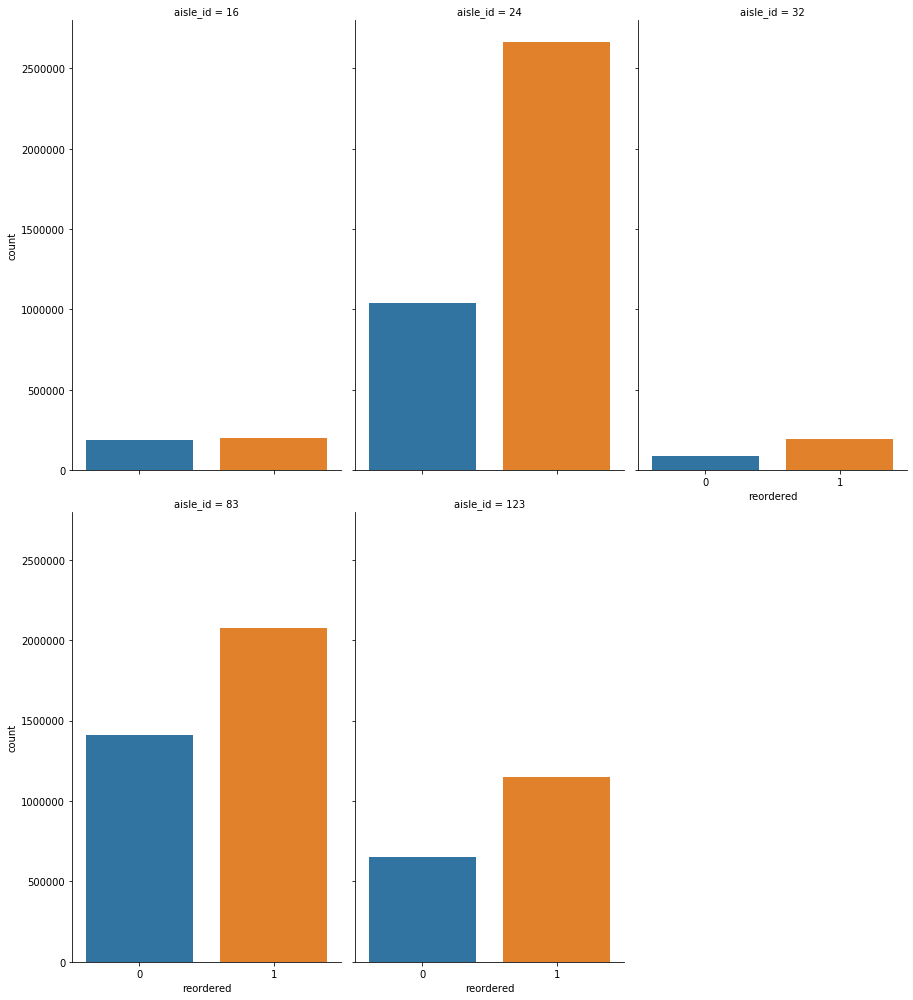

In [155]:
sns_dp4 = sns.catplot(x = 'reordered',col='aisle_id',data=order_dp4,kind="count",height=7, aspect=.6, col_wrap=3)
sns_dp4.savefig('sns_dp4.png')

In [26]:
print(aisles[aisles['aisle_id'] == 24])
print(aisles[aisles['aisle_id'] == 83])
print(aisles[aisles['aisle_id'] == 123])

    aisle_id         aisle
23        24  fresh fruits
    aisle_id             aisle
82        83  fresh vegetables
     aisle_id                       aisle
122       123  packaged vegetables fruits


In [156]:
gc.collect()

35

* department 7 回購率集中在氣泡飲料&冷藏品

In [157]:
order_dp7 = order_withpt[order_withpt['department_id'] == 7]

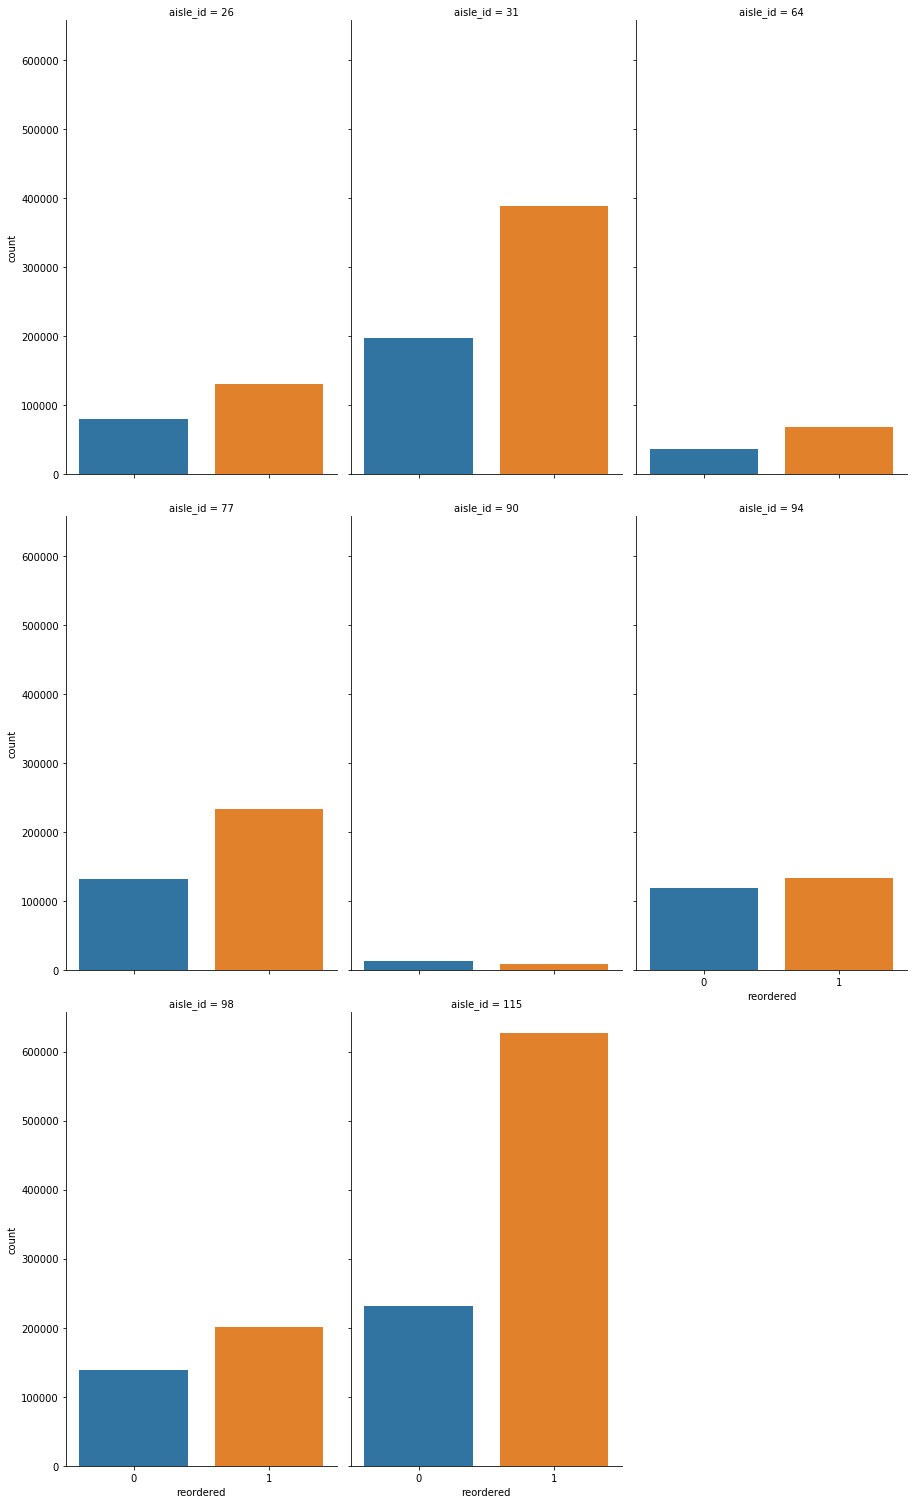

In [158]:
sns_dp7 = sns.catplot(x = 'reordered',col='aisle_id',data=order_dp7,kind="count",height=7, aspect=.6, col_wrap=3)
sns_dp7.savefig('sns_dp7.png')

In [28]:
print(aisles[aisles['aisle_id'] == 31])
print(aisles[aisles['aisle_id'] == 77])
print(aisles[aisles['aisle_id'] == 115])

    aisle_id         aisle
30        31  refrigerated
    aisle_id        aisle
76        77  soft drinks
     aisle_id                          aisle
114       115  water seltzer sparkling water


In [161]:
gc.collect()

33

* department 16 回購率集中在起士、牛奶、蛋、優格

In [159]:
order_dp16 = order_withpt[order_withpt['department_id'] ==16]

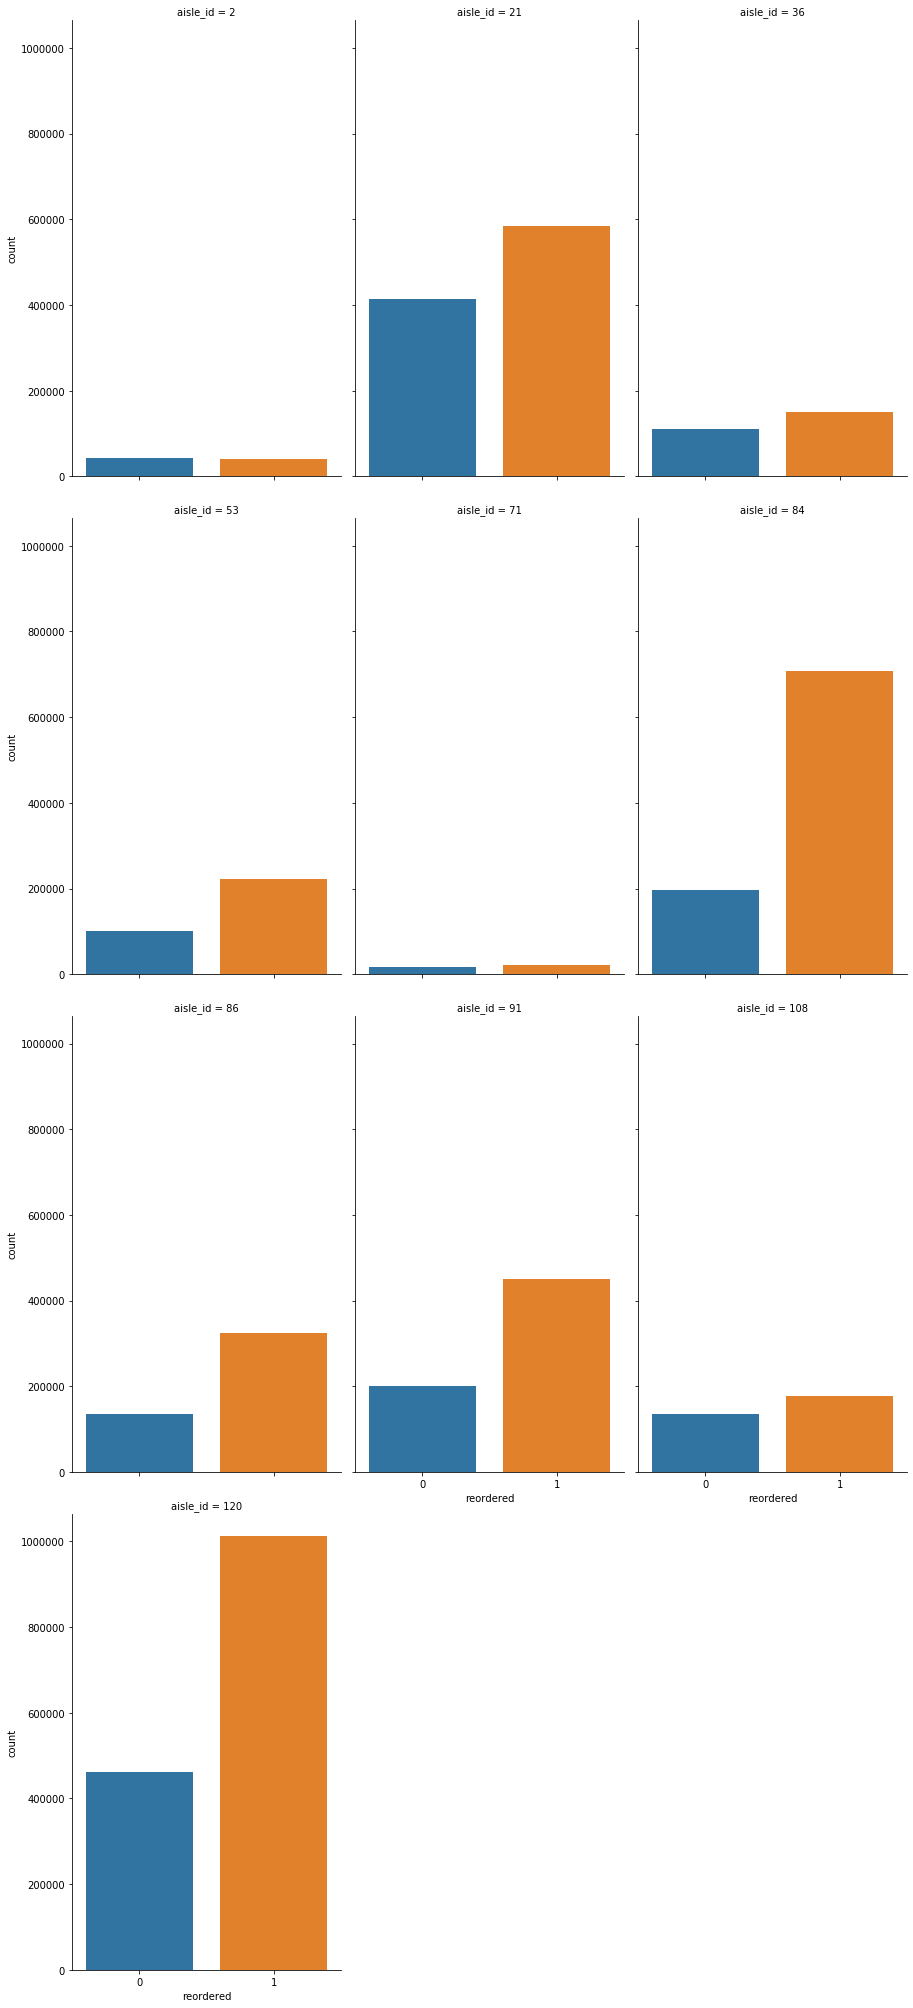

In [162]:
sns_dp16 = sns.catplot(x = 'reordered',col='aisle_id',data=order_dp16,kind="count",height=7, aspect=.6, col_wrap=3)
sns_dp16.savefig('sns_dp16.png')

In [30]:
print(aisles[aisles['aisle_id'] == 21])
print(aisles[aisles['aisle_id'] == 84])
print(aisles[aisles['aisle_id'] == 86])
print(aisles[aisles['aisle_id'] == 91])
print(aisles[aisles['aisle_id'] == 120])

    aisle_id            aisle
20        21  packaged cheese
    aisle_id aisle
83        84  milk
    aisle_id aisle
85        86  eggs
    aisle_id            aisle
90        91  soy lactosefree
     aisle_id   aisle
119       120  yogurt


In [163]:
gc.collect()

65

### reorder & non-reorderd 的時段

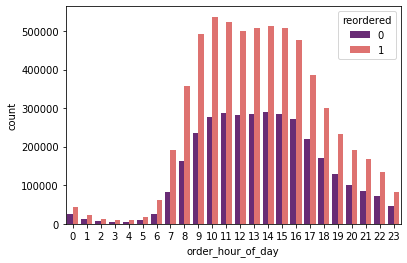

In [195]:
sns_re_non = sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp4, palette = 'magma')
sns_re_non.figure.savefig('reordered_nonreordered_time.png', bbox_inches='tight')

## 高回購率的department

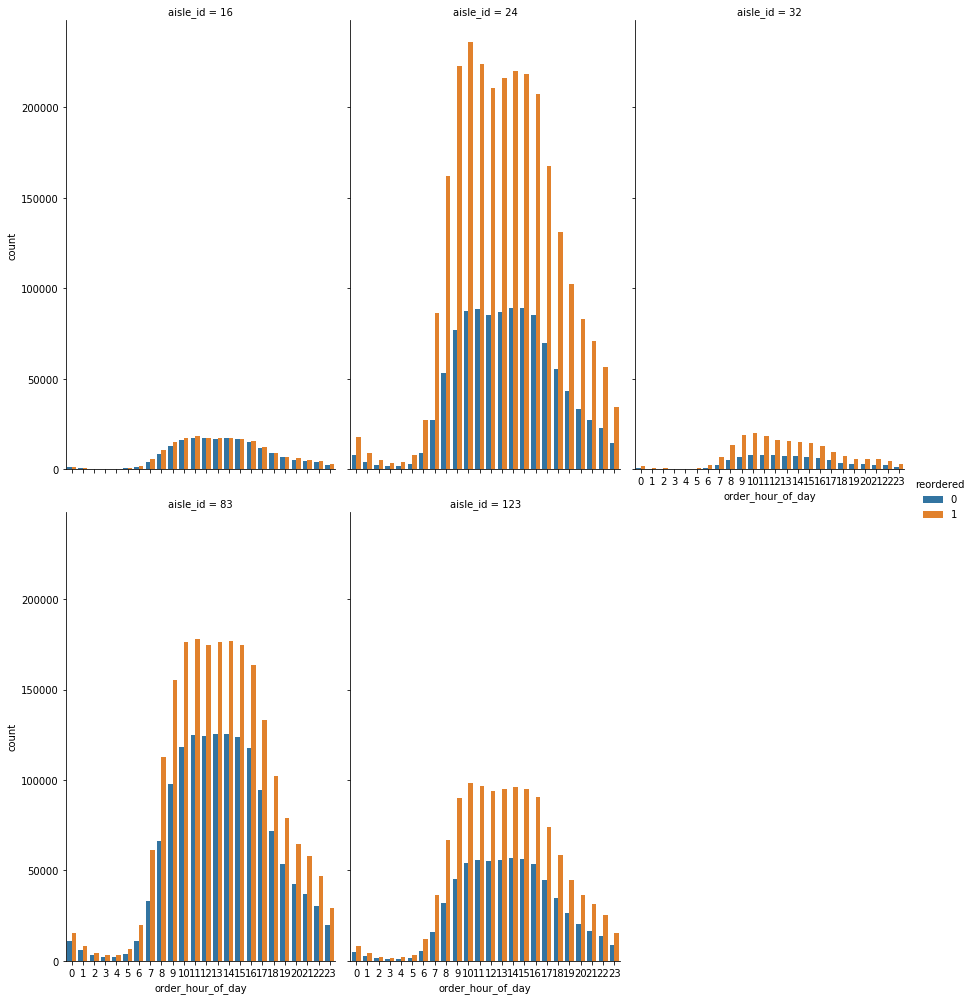

In [28]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp4,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

In [61]:
order_ais_24 = order_dp4[order_dp4['aisle_id'] == 24]
order_ais_83 = order_dp4[order_dp4['aisle_id'] == 83]
order_ais_123 = order_dp4[order_dp4['aisle_id'] == 123]

In [77]:
group24 = order_ais_24.groupby(by=['product_id','order_hour_of_day']).agg({'reordered':sum, 'order_id':lambda x : x.count()}).sort_values(by='reordered', ascending = False)

In [81]:
group24.index[]

(24852, 9)

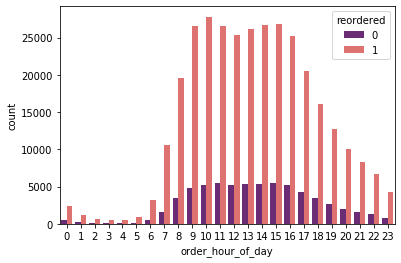

In [79]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_ais_24[order_ais_24['product_id']==13176], palette = 'magma')

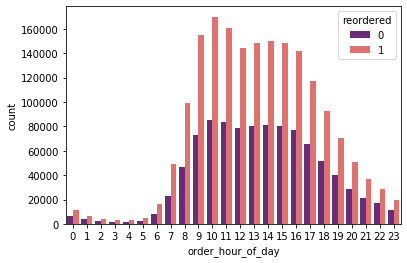

In [30]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp7, palette = 'magma')

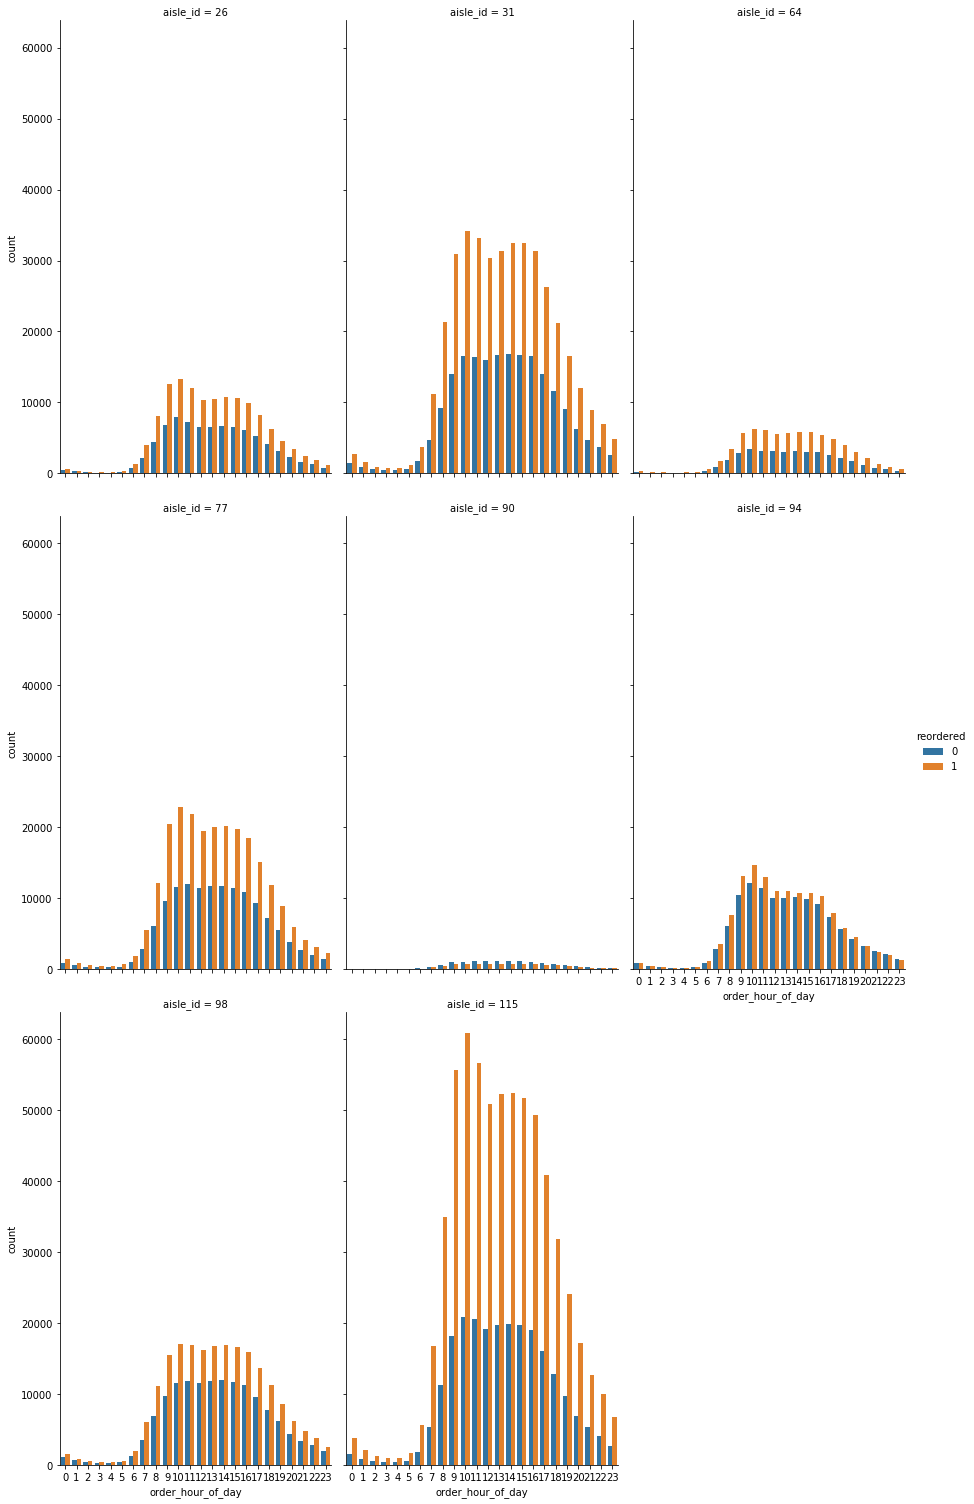

In [31]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp7,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

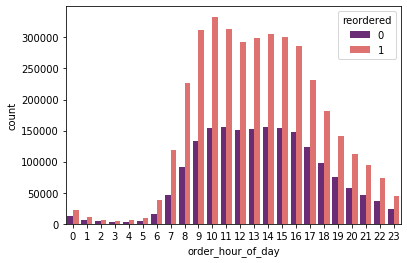

In [32]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp16, palette = 'magma')

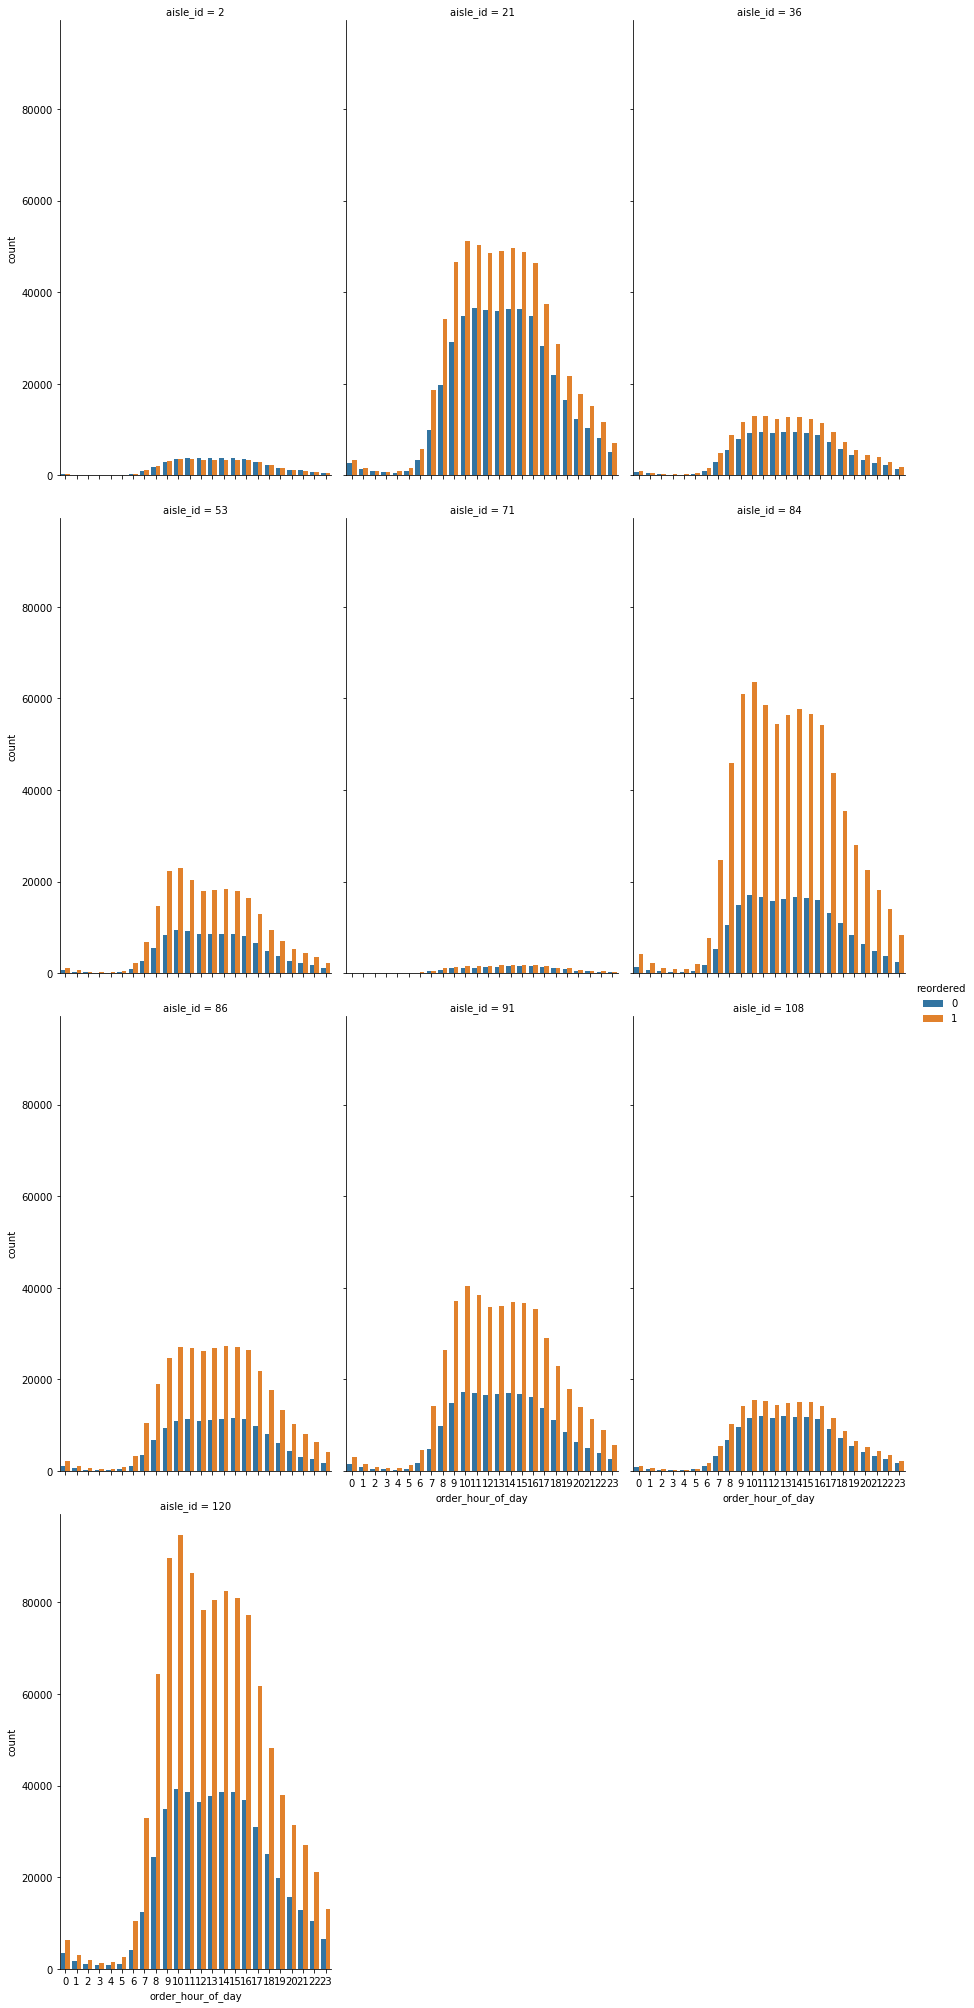

In [34]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp16,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

### 回購率低的department(11,13,15,17)

In [35]:
order_dp11 = order_withpt[order_withpt['department_id'] ==11]
order_dp13 = order_withpt[order_withpt['department_id'] ==13]
order_dp15 = order_withpt[order_withpt['department_id'] ==15]
order_dp17 = order_withpt[order_withpt['department_id'] ==17]

* <b>department 11</b>

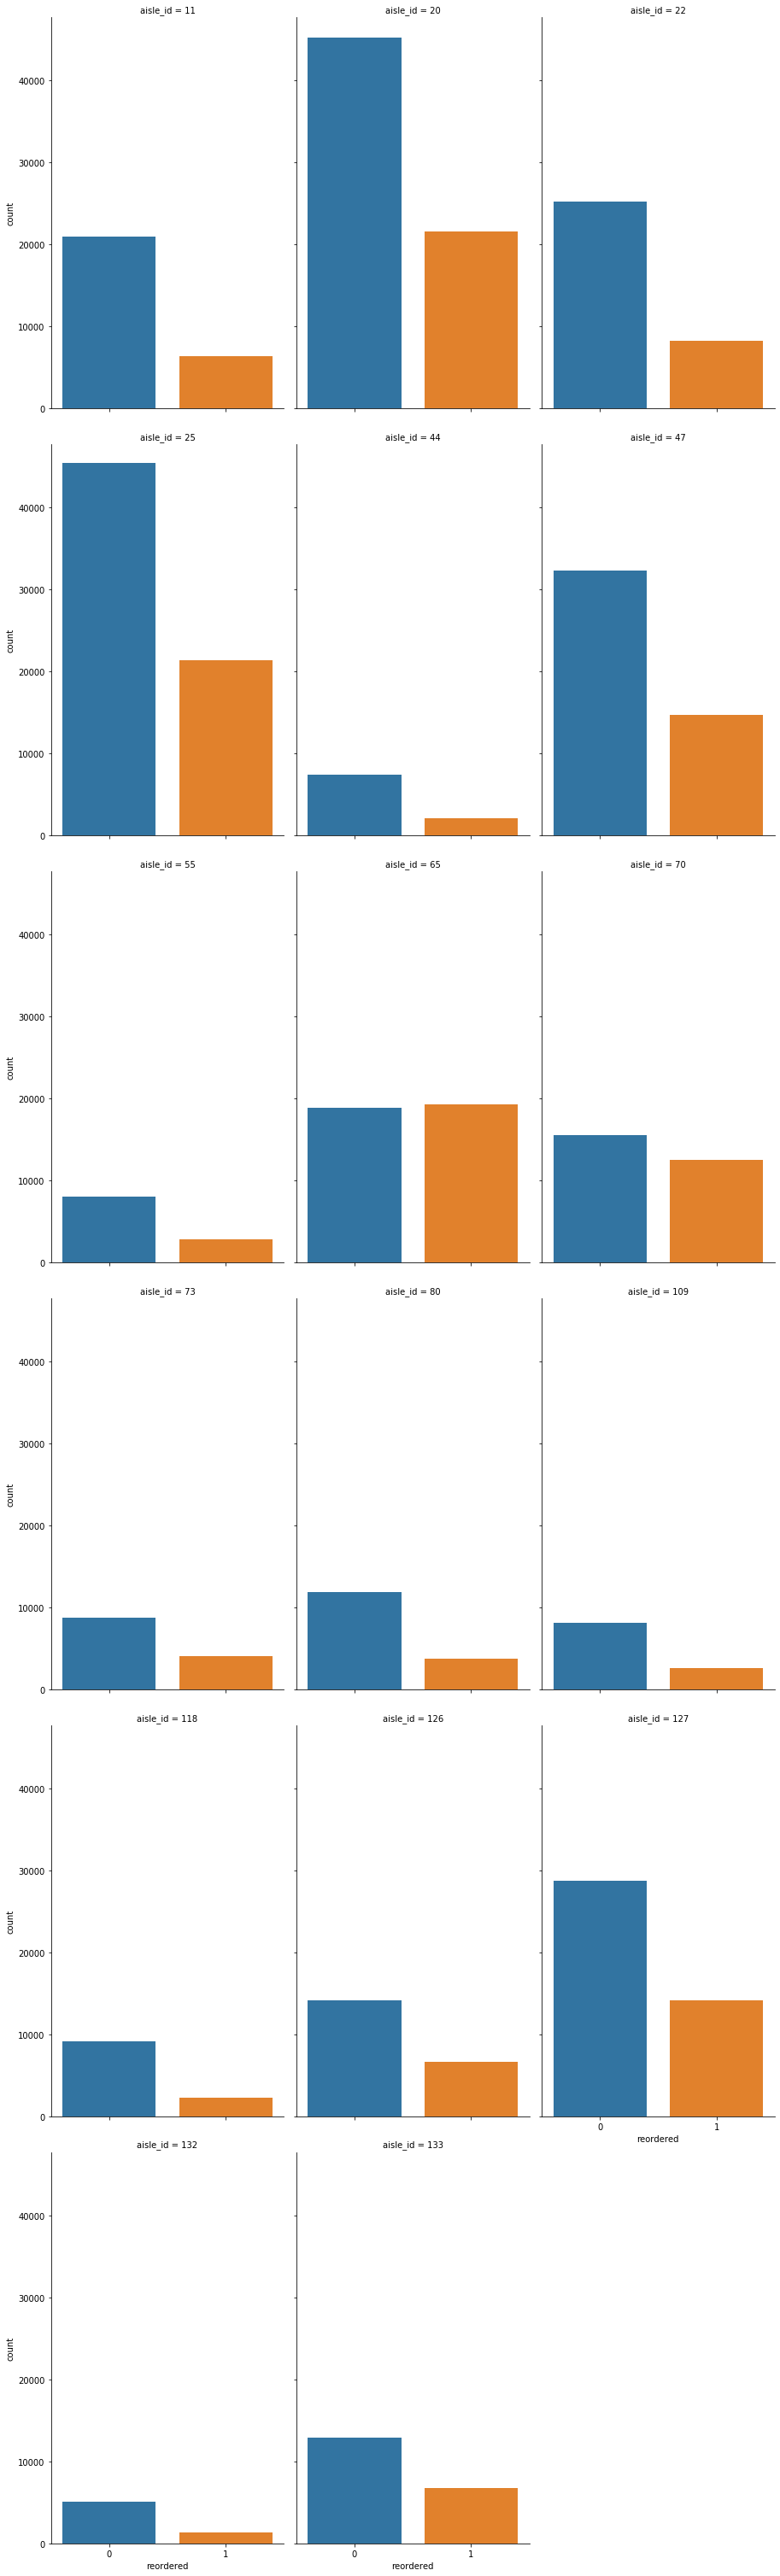

In [37]:
sns.catplot(x = 'reordered',col='aisle_id',data=order_dp11,kind="count",height=7, aspect=.6, col_wrap=3)

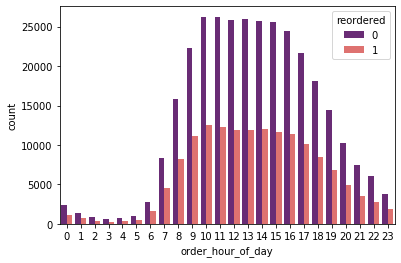

In [41]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp11, palette = 'magma')

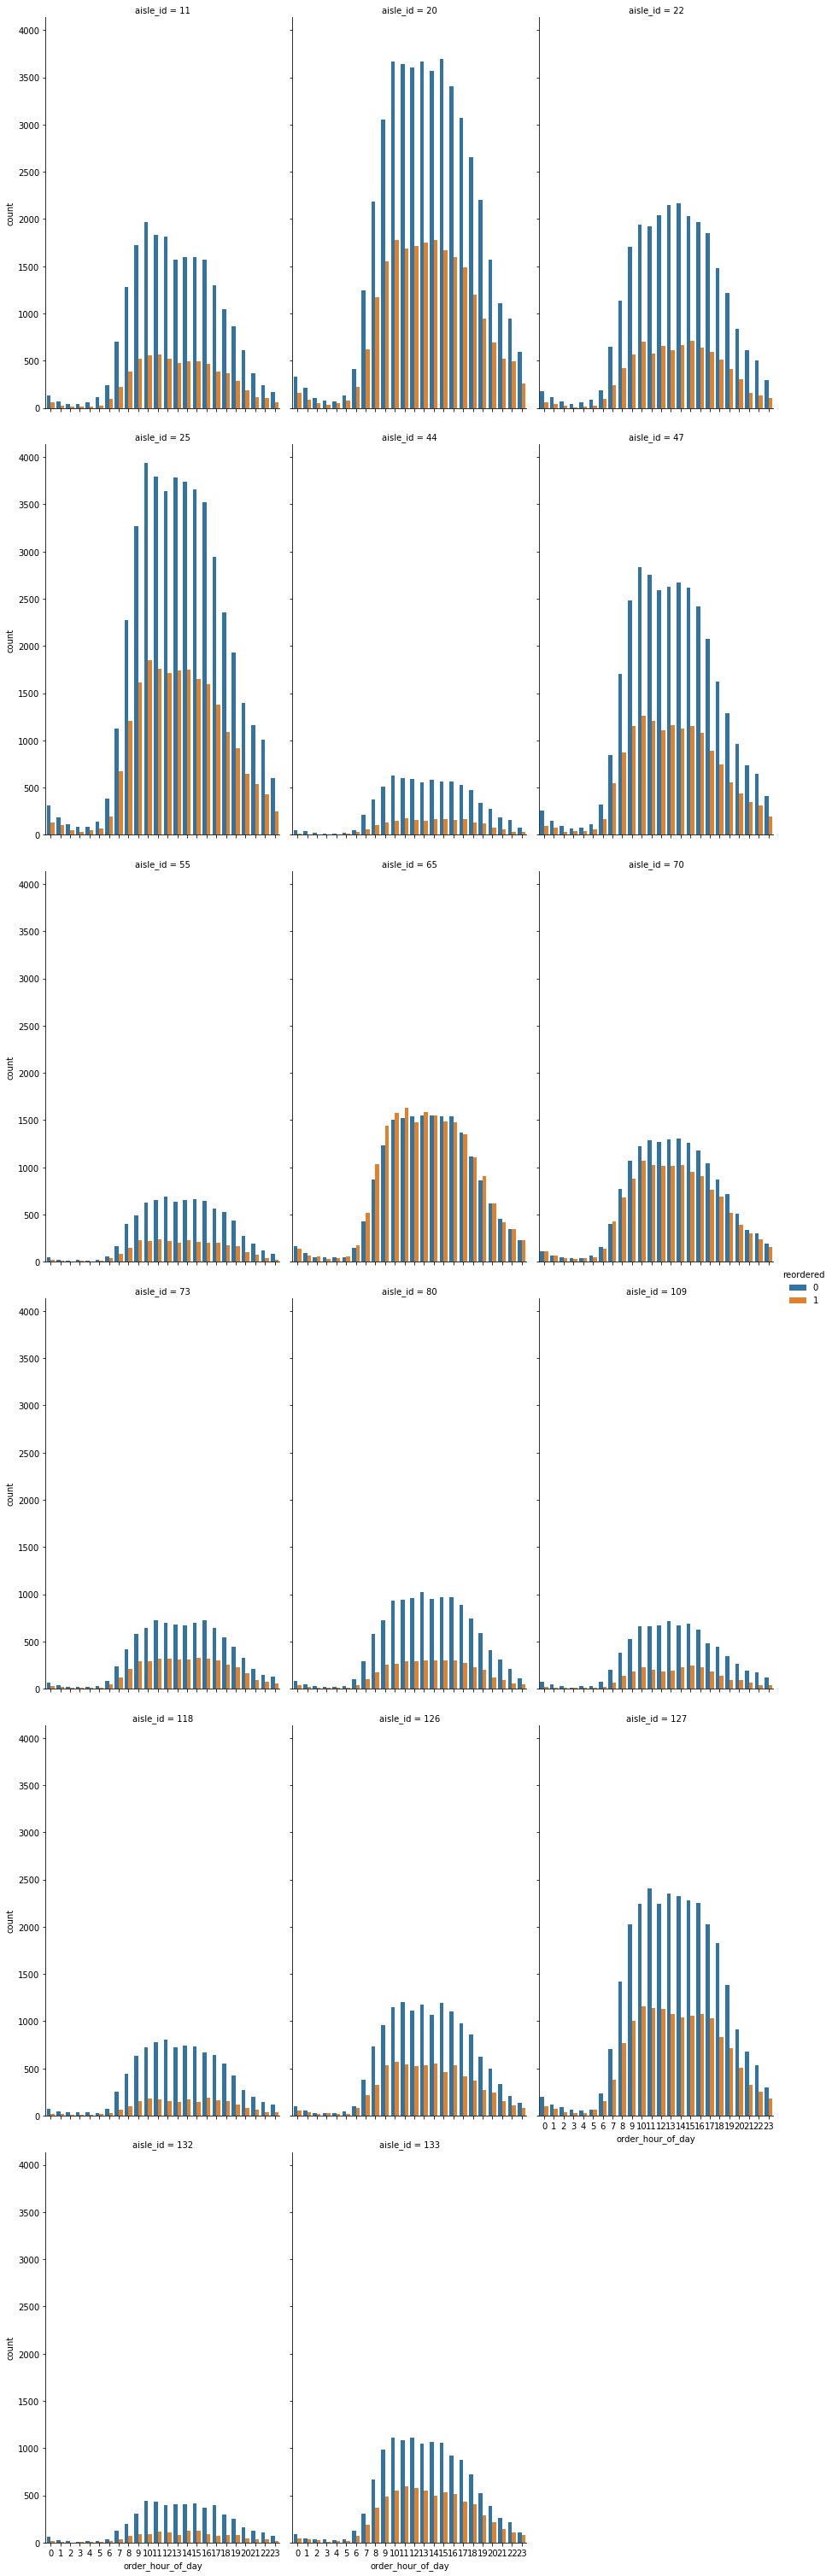

In [42]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp11,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

In [43]:
print(aisles[aisles['aisle_id'] == 11])
print(aisles[aisles['aisle_id'] == 20])
print(aisles[aisles['aisle_id'] == 22])
print(aisles[aisles['aisle_id'] == 25])
print(aisles[aisles['aisle_id'] == 47])
print(aisles[aisles['aisle_id'] == 65])
print(aisles[aisles['aisle_id'] == 127])

    aisle_id             aisle
10        11  cold flu allergy
    aisle_id         aisle
19        20  oral hygiene
    aisle_id      aisle
21        22  hair care
    aisle_id aisle
24        25  soap
    aisle_id                 aisle
46        47  vitamins supplements
    aisle_id                      aisle
64        65  protein meal replacements
     aisle_id              aisle
126       127  body lotions soap


* <b>department 13</b>

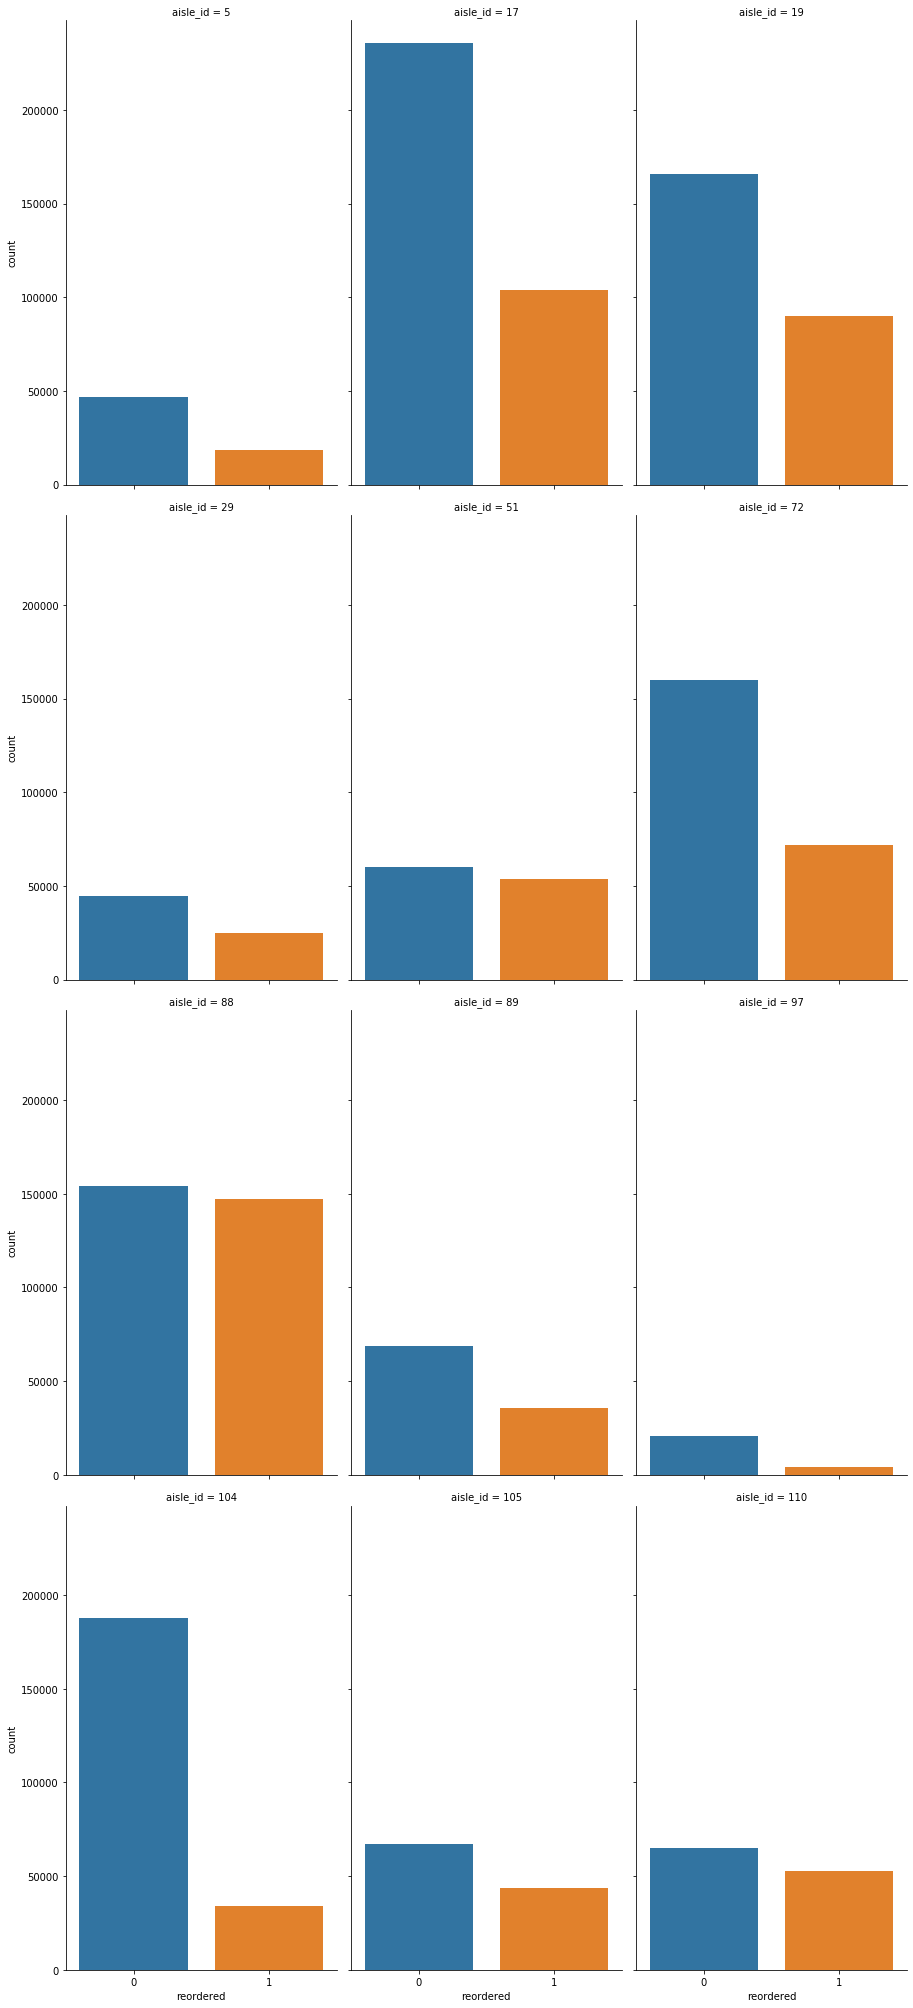

In [38]:
sns.catplot(x = 'reordered',col='aisle_id',data=order_dp13,kind="count",height=7, aspect=.6, col_wrap=3)

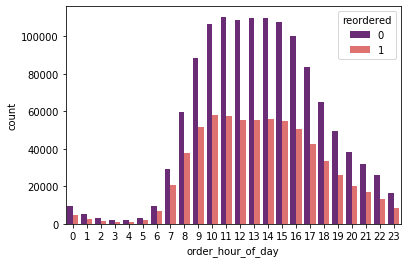

In [44]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp13, palette = 'magma')

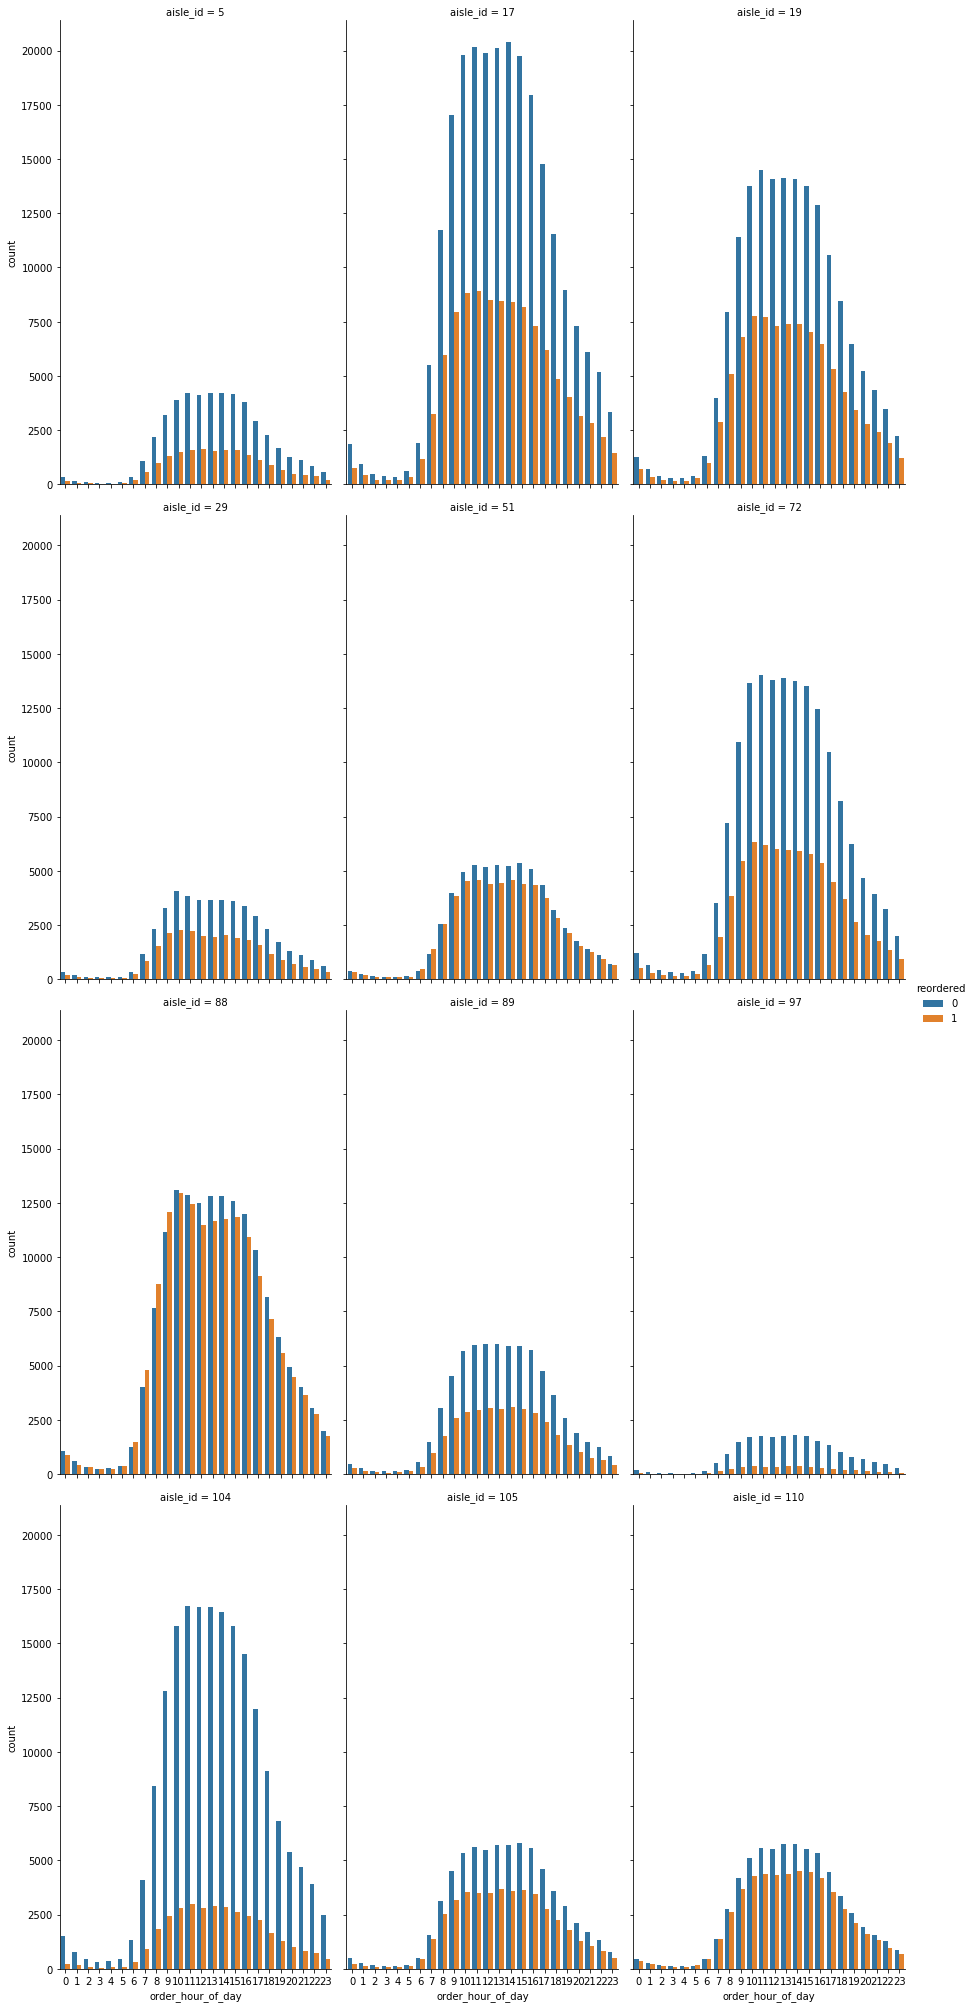

In [45]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp13,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

In [47]:
print(aisles[aisles['aisle_id'] == 88])
print(aisles[aisles['aisle_id'] == 17])
print(aisles[aisles['aisle_id'] == 19])
print(aisles[aisles['aisle_id'] == 72])
print(aisles[aisles['aisle_id'] == 104])

    aisle_id    aisle
87        88  spreads
    aisle_id               aisle
16        17  baking ingredients
    aisle_id          aisle
18        19  oils vinegars
    aisle_id       aisle
71        72  condiments
     aisle_id              aisle
103       104  spices seasonings


* <b>department 15</b>

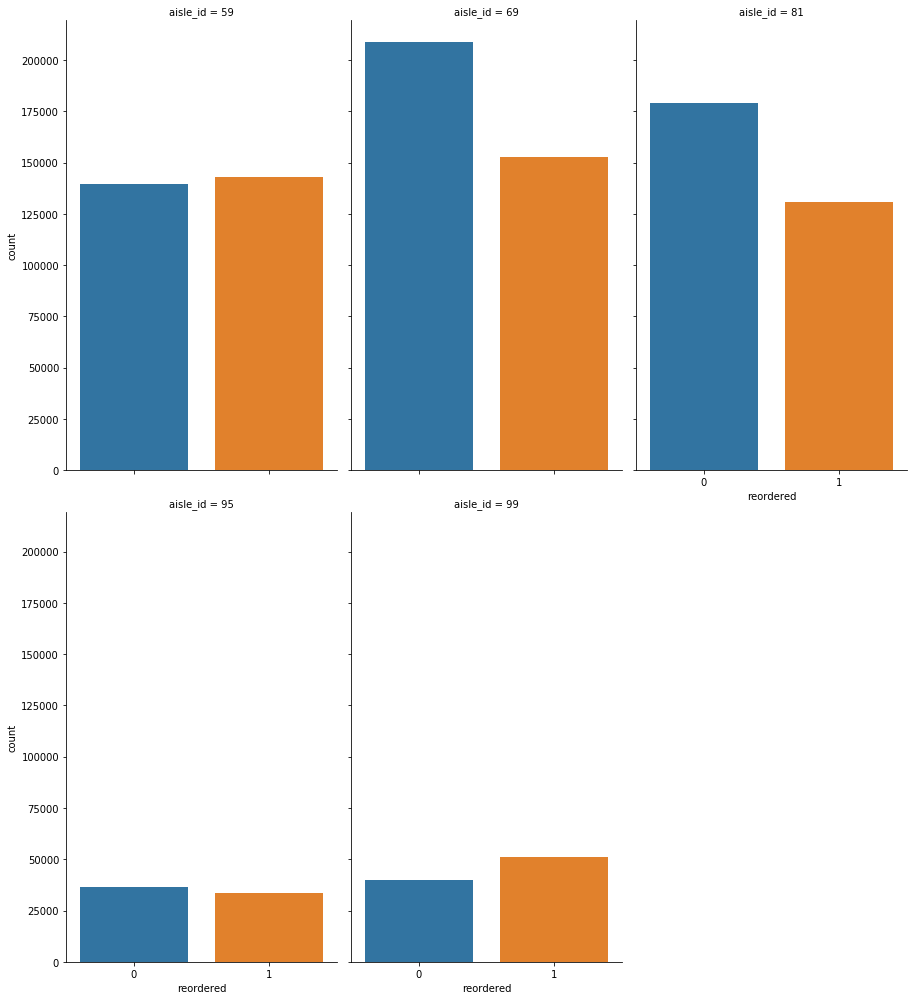

In [39]:
sns.catplot(x = 'reordered',col='aisle_id',data=order_dp15,kind="count",height=7, aspect=.6, col_wrap=3)

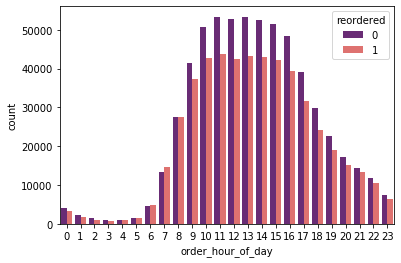

In [48]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp15, palette = 'magma')

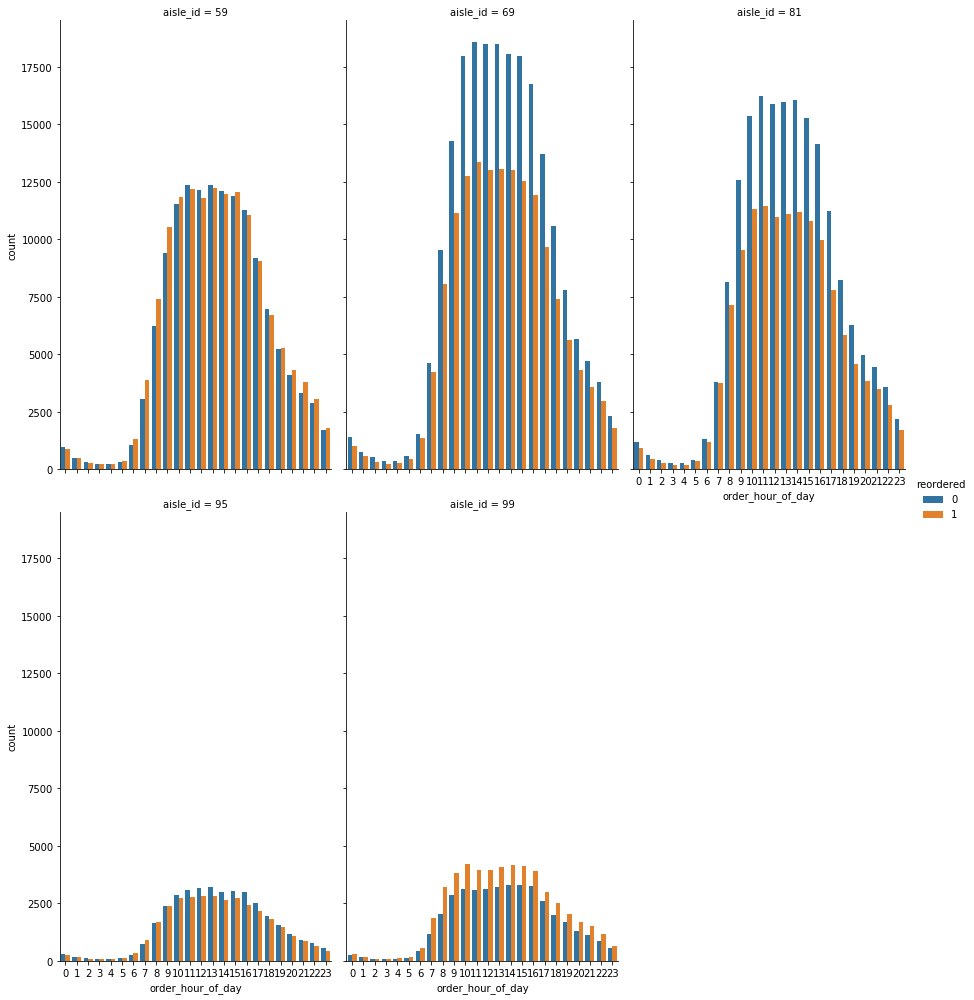

In [49]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp15,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

In [50]:
print(aisles[aisles['aisle_id'] == 69])
print(aisles[aisles['aisle_id'] == 81])

    aisle_id                aisle
68        69  soup broth bouillon
    aisle_id                     aisle
80        81  canned jarred vegetables


* <b>department 17</b>

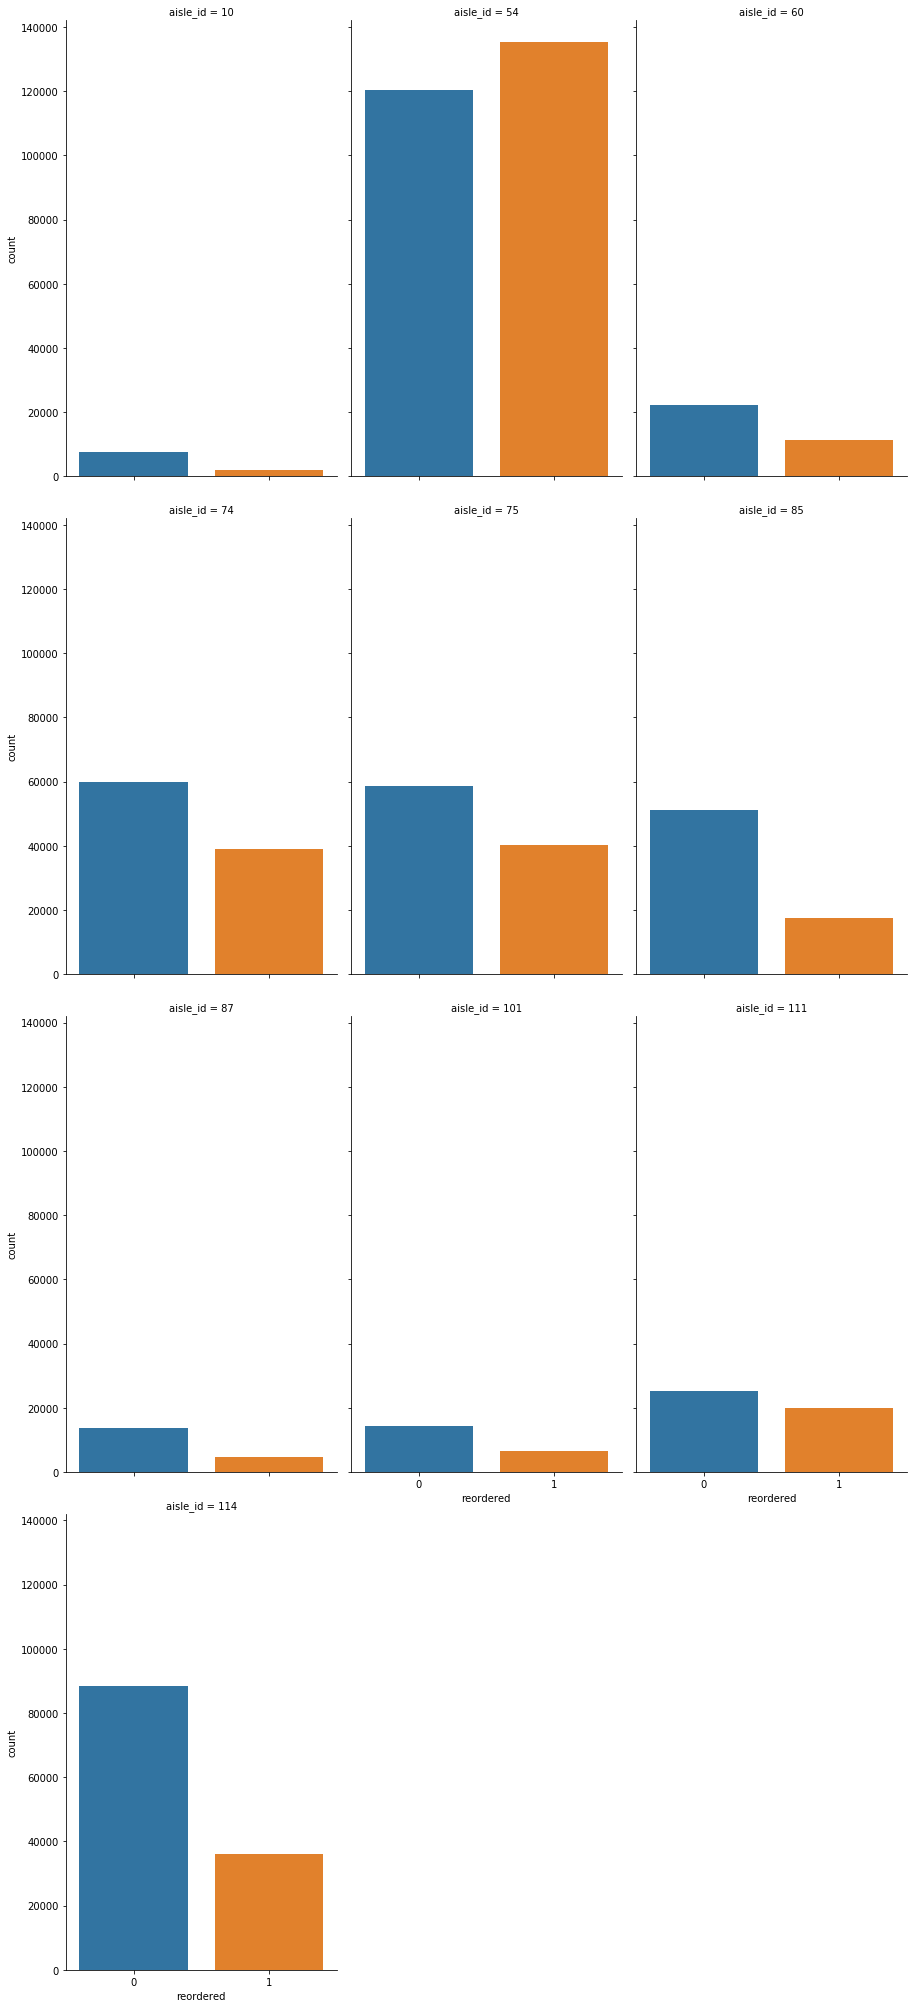

In [40]:
sns.catplot(x = 'reordered',col='aisle_id',data=order_dp17,kind="count",height=7, aspect=.6, col_wrap=3)

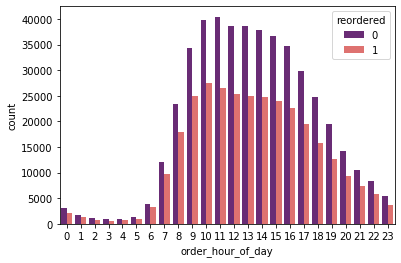

In [51]:
sns.countplot(x='order_hour_of_day', hue='reordered', data = order_dp17, palette = 'magma')

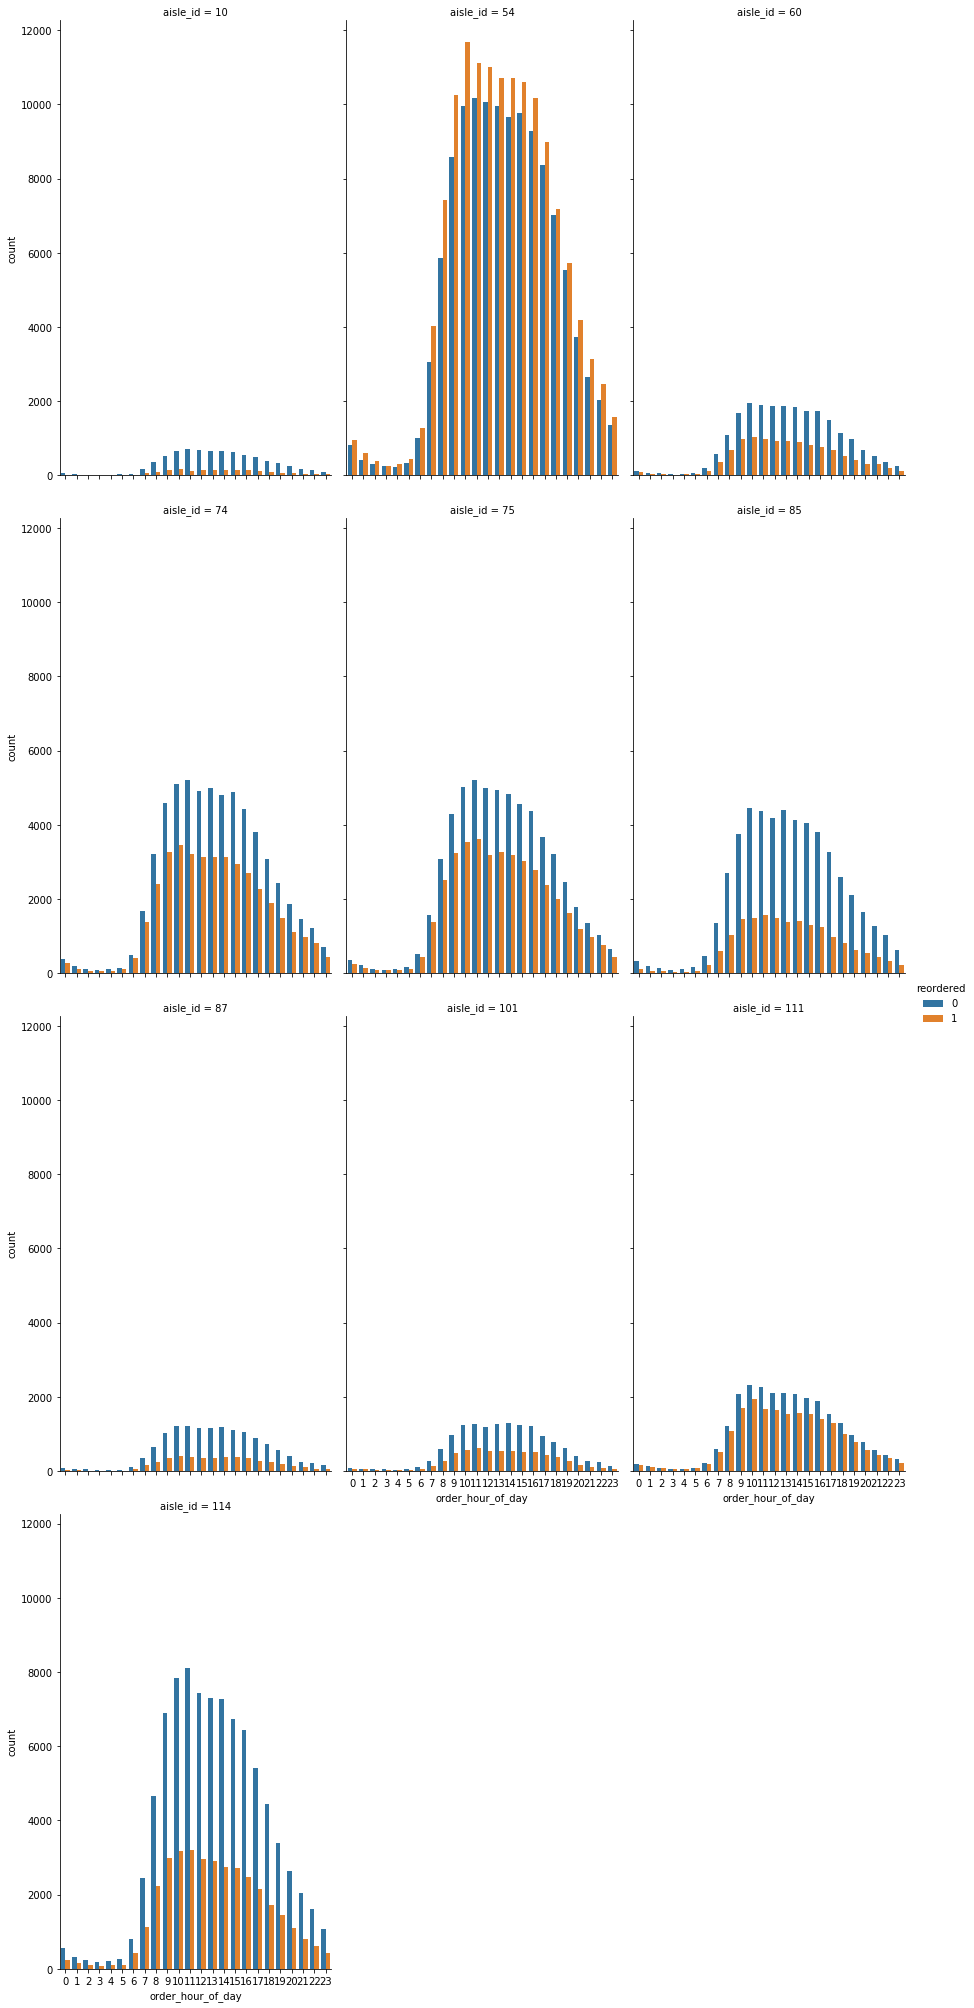

In [52]:
sns.catplot(x = 'order_hour_of_day',col='aisle_id',data=order_dp17,kind="count",height=7, aspect=.6, col_wrap=3, hue='reordered')

In [59]:
print(aisles[aisles['aisle_id'] == 54])

    aisle_id        aisle
53        54  paper goods
